In [1]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc
import itertools
from itertools import combinations_with_replacement, combinations, permutations

import bo_methods_lib
from bo_methods_lib.bo_methods_lib.GPBO_Classes_New import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Class_fxns import * #Fix this later
from bo_methods_lib.bo_methods_lib.analyze_data import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import * #Fix this later
import pympler
import pickle
import signac

from pympler import asizeof

from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

#Ignore inconcistent version warning
import warnings
from sklearn.exceptions import InconsistentVersionWarning
warnings.filterwarnings(action='ignore', category=InconsistentVersionWarning)

In [2]:
#From signac
import signac
meth_name_val_list = [1, 2, 3, 4, 5, 6]
save_csv = False

criteria_dict = {"cs_name_val" : 1,
                 "ep_enum_val": {"$gte": 1},
                 "meth_name_val": {"$in": meth_name_val_list}}

criteria_dict = {"cs_name_val" : 1,
                 "ep_enum_val": 1,
                 "meth_name_val": {"$in": meth_name_val_list}}

# criteria_dict = {"cs_name_val" : 1,
#                  "param_name_str" : "t1t2",
#                  "ep_enum_val":1,
#                  "retrain_GP": 25,
#                  "num_x_data": 5,
#                  "outputscl": None,
#                  "bo_iter_tot": 50,
#                  "lenscl": None}

df, job_list, theta_true = get_df_all_jobs(criteria_dict, save_csv)
# print(df.head())

In [3]:
### Get Best Data from ep experiment
df_best, job_list_best = get_best_data(criteria_dict, df, job_list, theta_true, save_csv)

for i in range(len(job_list_best)): 
    print(job_list_best[i].id)
    
df_best

7d335fac3f3dbef1def51beac296d8bf
f77eb15458c0df1814cb2d097bc16619
bfaeb98a04d2a186bf9fc0c5a87602e7
6c8f446e38438959407a256119512c05
08978be5acb14bc5c527c23532eaa621
811c3b5e401ba0adcedd67a67dbf2457


Run Number  BO Iter    Best Error  Exploration Bias        Max EI  \
372           1        8  9.029940e-02               1.0  0.000000e+00   
817           3        6 -1.892925e+00               1.0  0.000000e+00   
649           1       42  1.396315e-07               1.0  2.263683e-74   
250           2       40 -2.040383e+01               1.0  8.980287e-03   
121           4       20  8.565752e-05               1.0  2.978017e-07   
437           1       19  7.555456e-05               1.0  2.116127e-07   

                  Theta Max EI       Min Obj   Min Obj Act  \
372  [ 0.31578947 -0.52631579]  6.610628e-02  1.354291e-02   
817  [-0.31578947  1.36842105] -2.405547e+00 -3.243061e+00   
649  [ 0.31578947 -0.52631579]  9.457331e-08  7.463492e-08   
250  [ 0.99998828 -1.0000088 ] -1.769546e+01 -1.891750e+01   
121  [ 0.86030407 -0.9106576 ]  9.371427e-07  1.260755e-06   
437  [ 0.93233966 -1.04803089]  5.692213e-07  2.295503e-07   

                 Theta Min Obj  Min Obj Cum.  ...     Regret     Speed  \
372  [ 0.97157427 -1.01267546]  1.354291e-02  ...   0.001223  0.000194   
817  [ 0.95131943 -1.02124522] -3.243061e+00  ...   0.000005  0.004339   
649  [ 0.99992487 -1.00002313]  7.463492e-08  ...   0.000004  0.001994   
250  [ 1.00001327 -1.00001128] -1.891750e+01  ...  77.330711  1.787861   
121  [ 1.00011553 -0.99981791]  1.260755e-06  ...   0.000014  0.000383   
437  [ 0.99997693 -0.99991879]  2.295503e-07  ...   0.000008  0.000194   

     Time/Iter  EP Method Val BO Method                            Job ID  \
372   2.373189       CONSTANT        A1  7d335fac3f3dbef1def51beac296d8bf   
817   3.135606       CONSTANT        B1  f77eb15458c0df1814cb2d097bc16619   
649  14.762938       CONSTANT        A2  bfaeb98a04d2a186bf9fc0c5a87602e7   
250  92.297088       CONSTANT        B2  6c8f446e38438959407a256119512c05   
121  11.821221       CONSTANT        C2  08978be5acb14bc5c527c23532eaa621   
437  15.449586       CONSTANT        D2  811c3b5e401ba0adcedd67a67dbf2457   

    Max Evals  Termination Total Run Time  L2 Norm Theta  
372        23       ei-obj      54.583346       0.031124  
817         7    ei-regret      21.949244       0.053115  
649        43          obj     634.806335       0.000079  
250        50   max_budget    4614.854407       0.000017  
121        35   obj-regret     413.742731       0.000216  
437        34   obj-regret     525.285929       0.000084  

[6 rows x 21 columns]

In [4]:
run_num_list = list(map(int, df_best["Run Number"].to_numpy()))
bo_iter_list = list(map(int, df_best["BO Iter"].to_numpy()))
bo_method_list = list(df_best["BO Method"].to_numpy())

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\conventional\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_1_iter_8


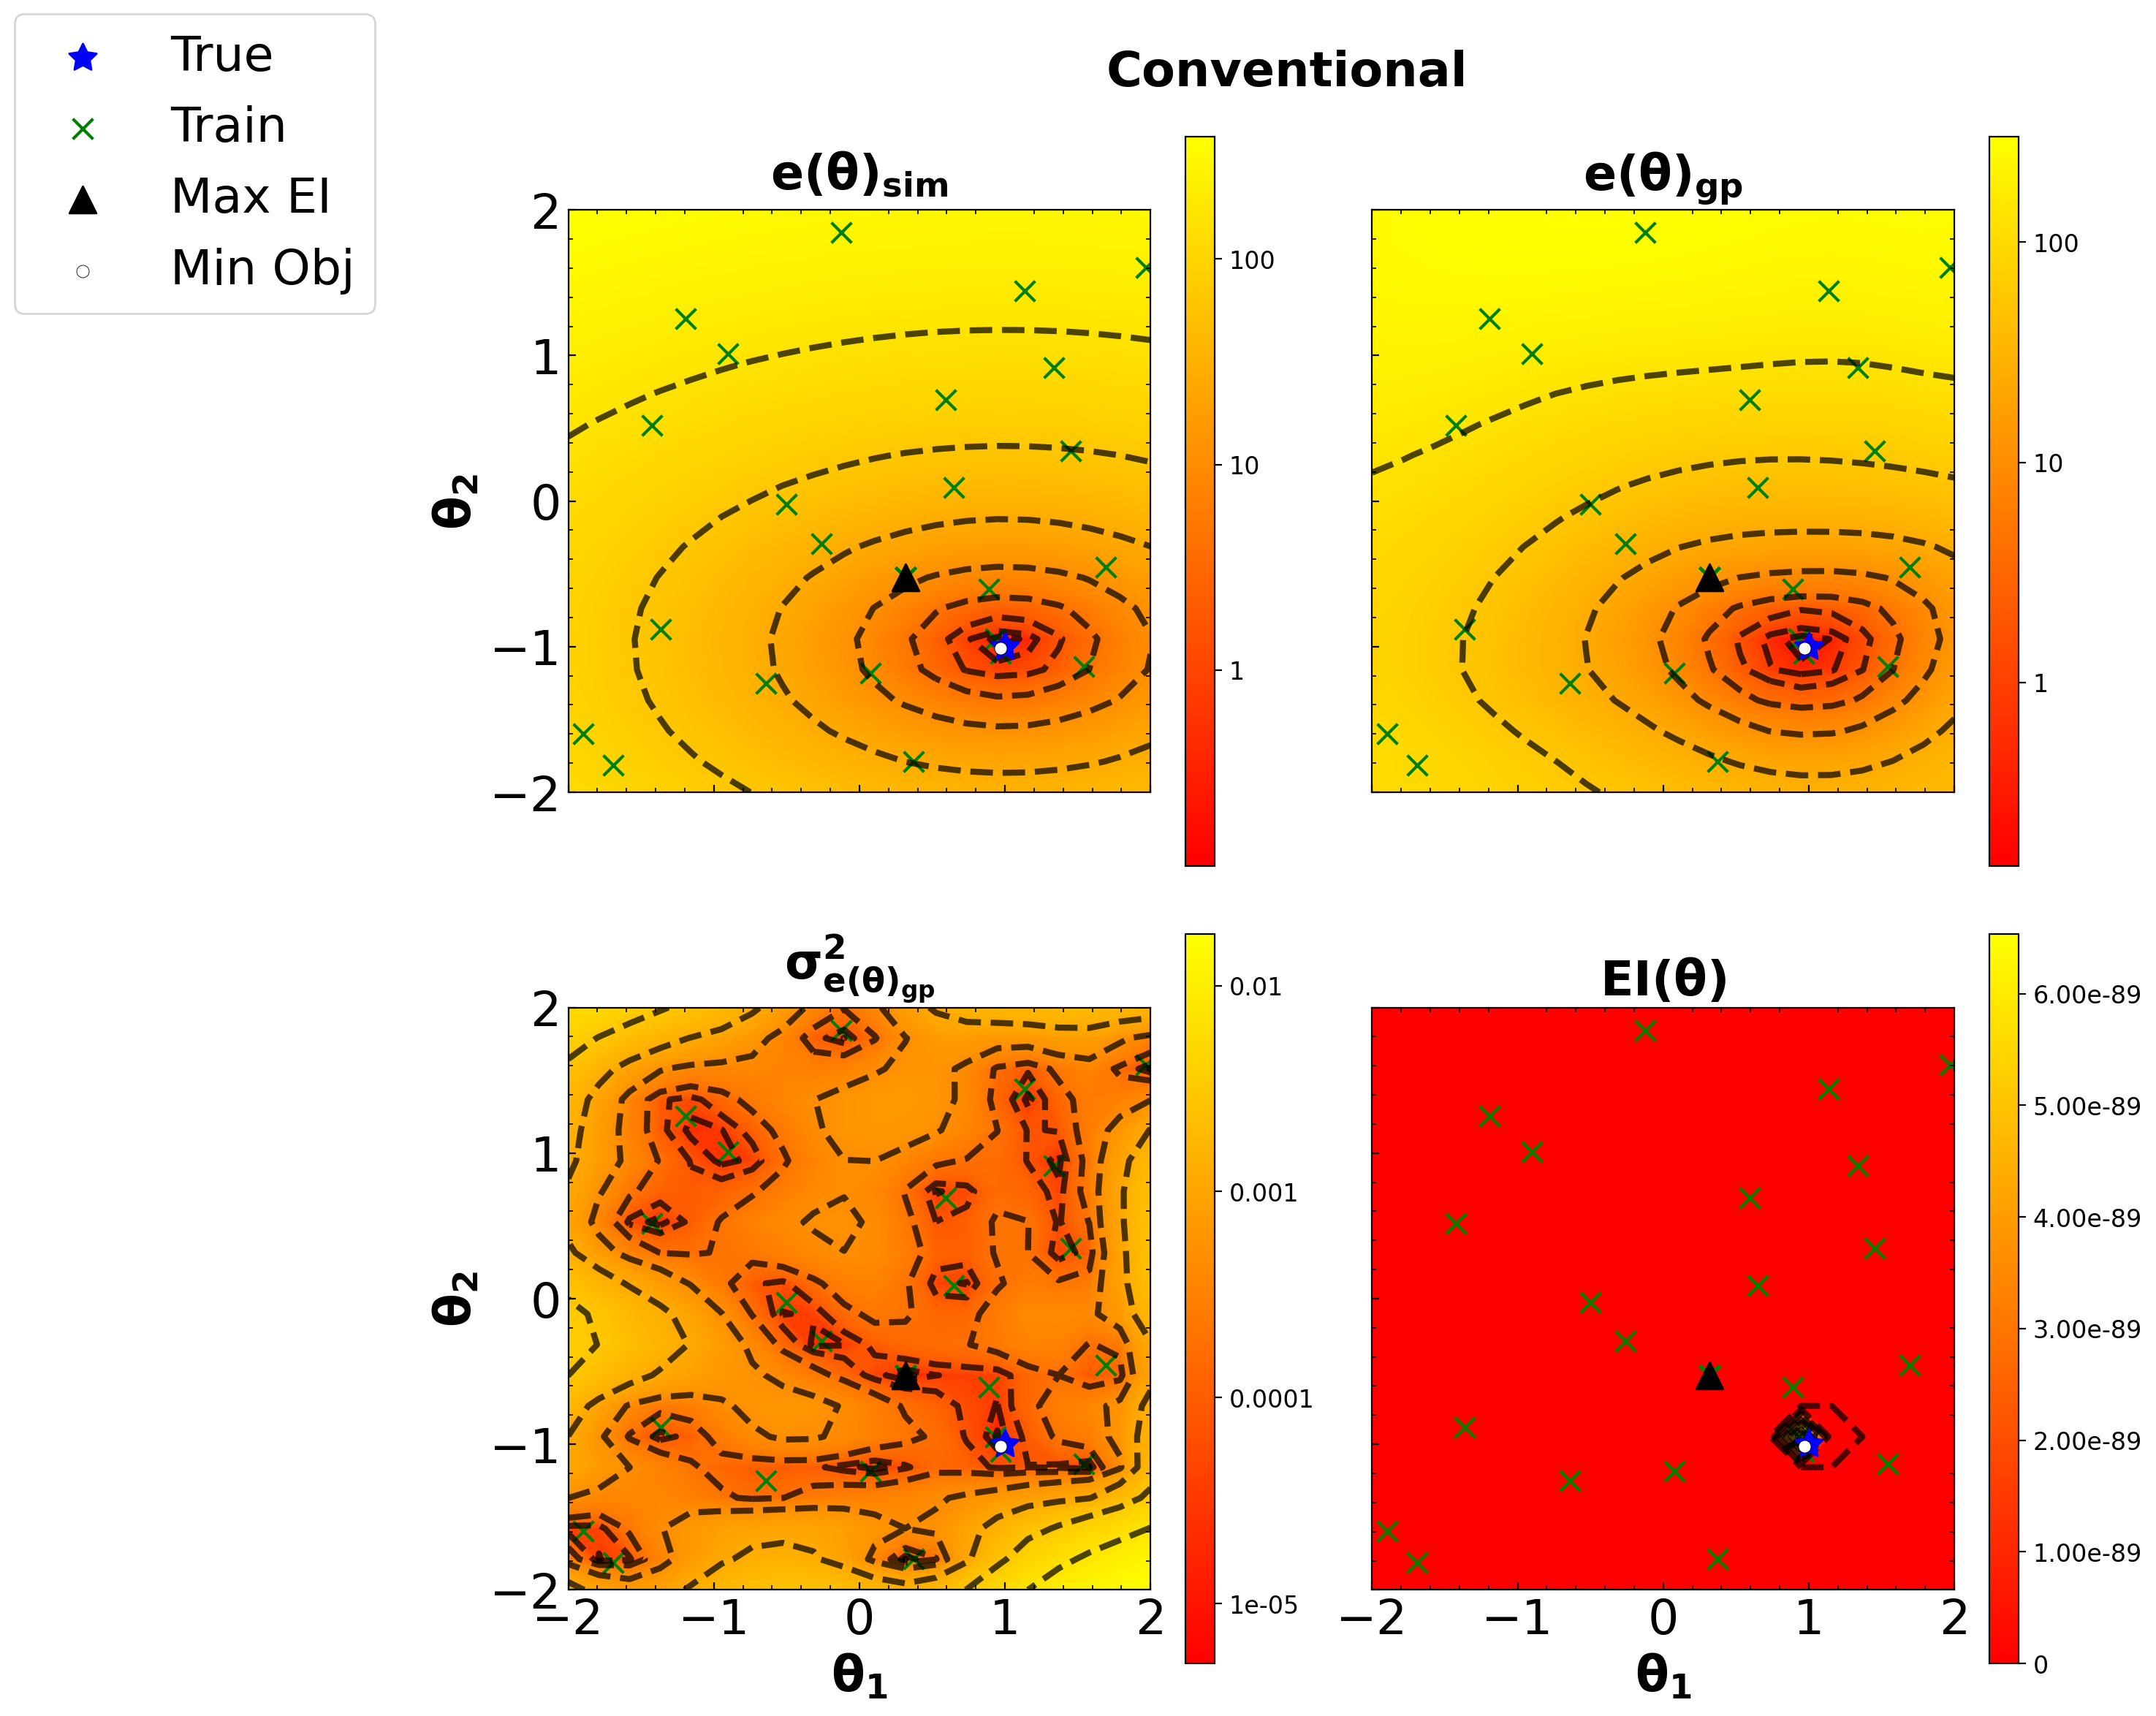

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\log_conventional\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_3_iter_6


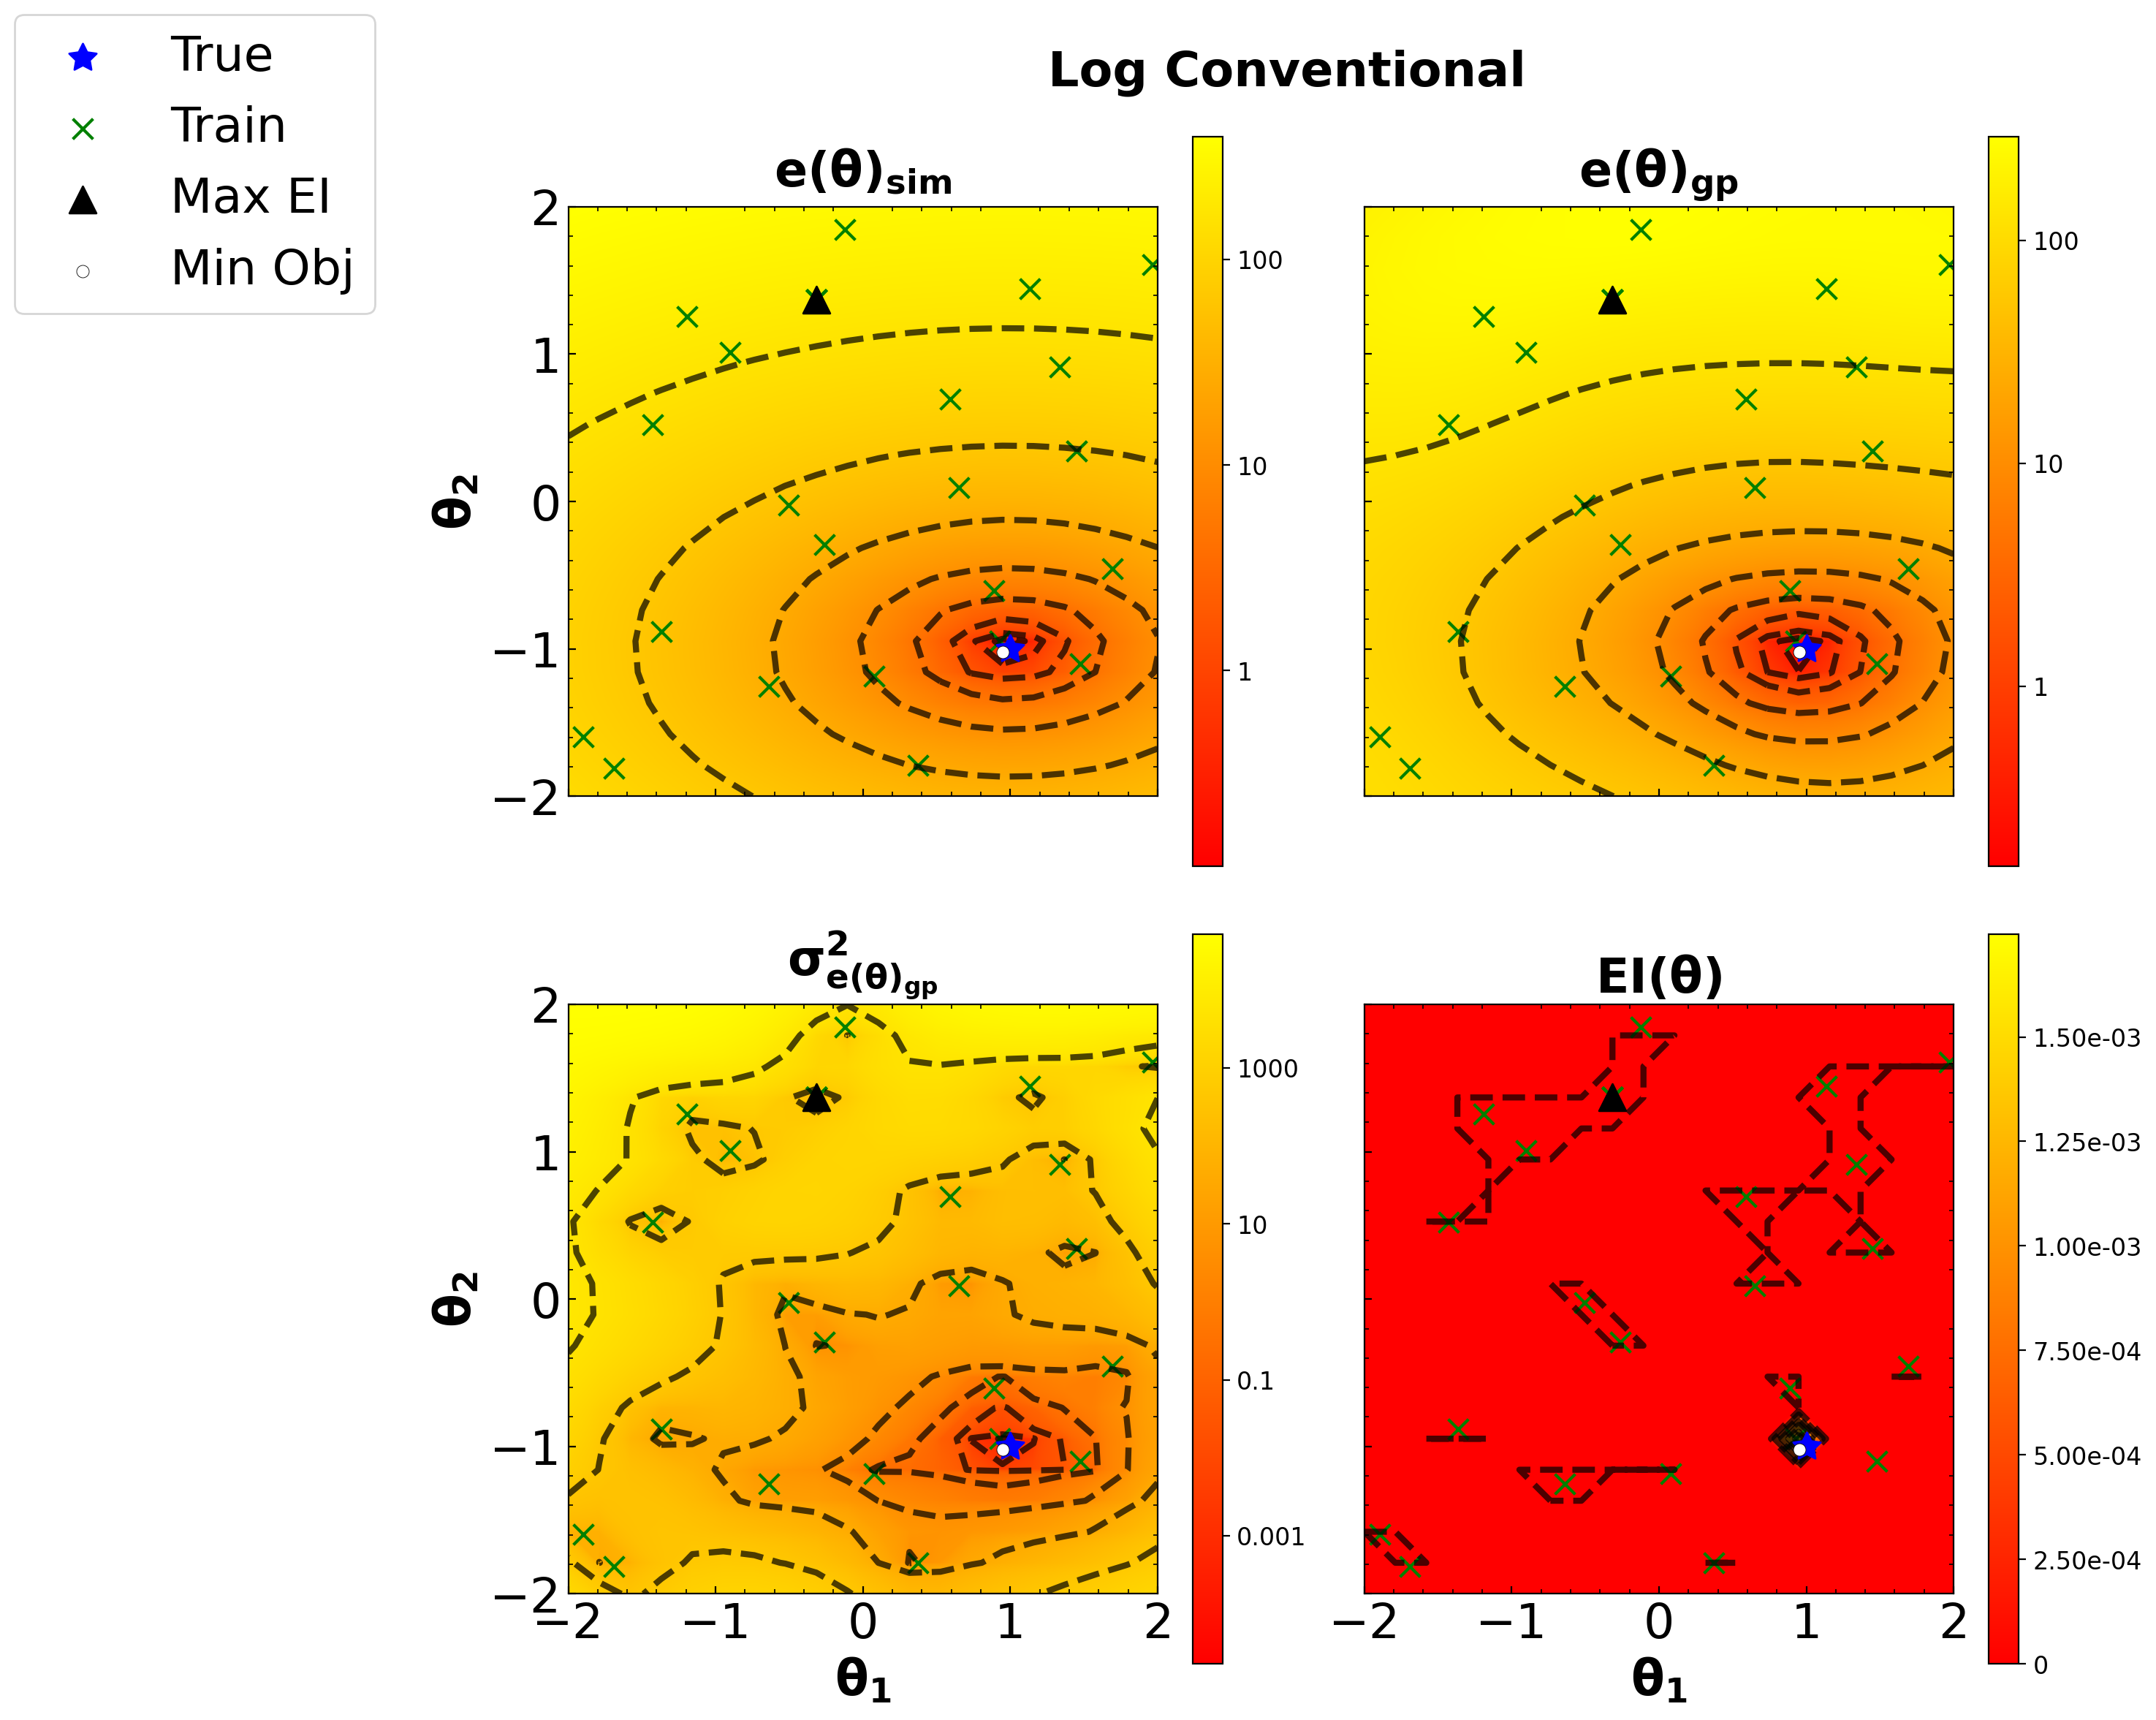

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\independence\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_1_iter_42


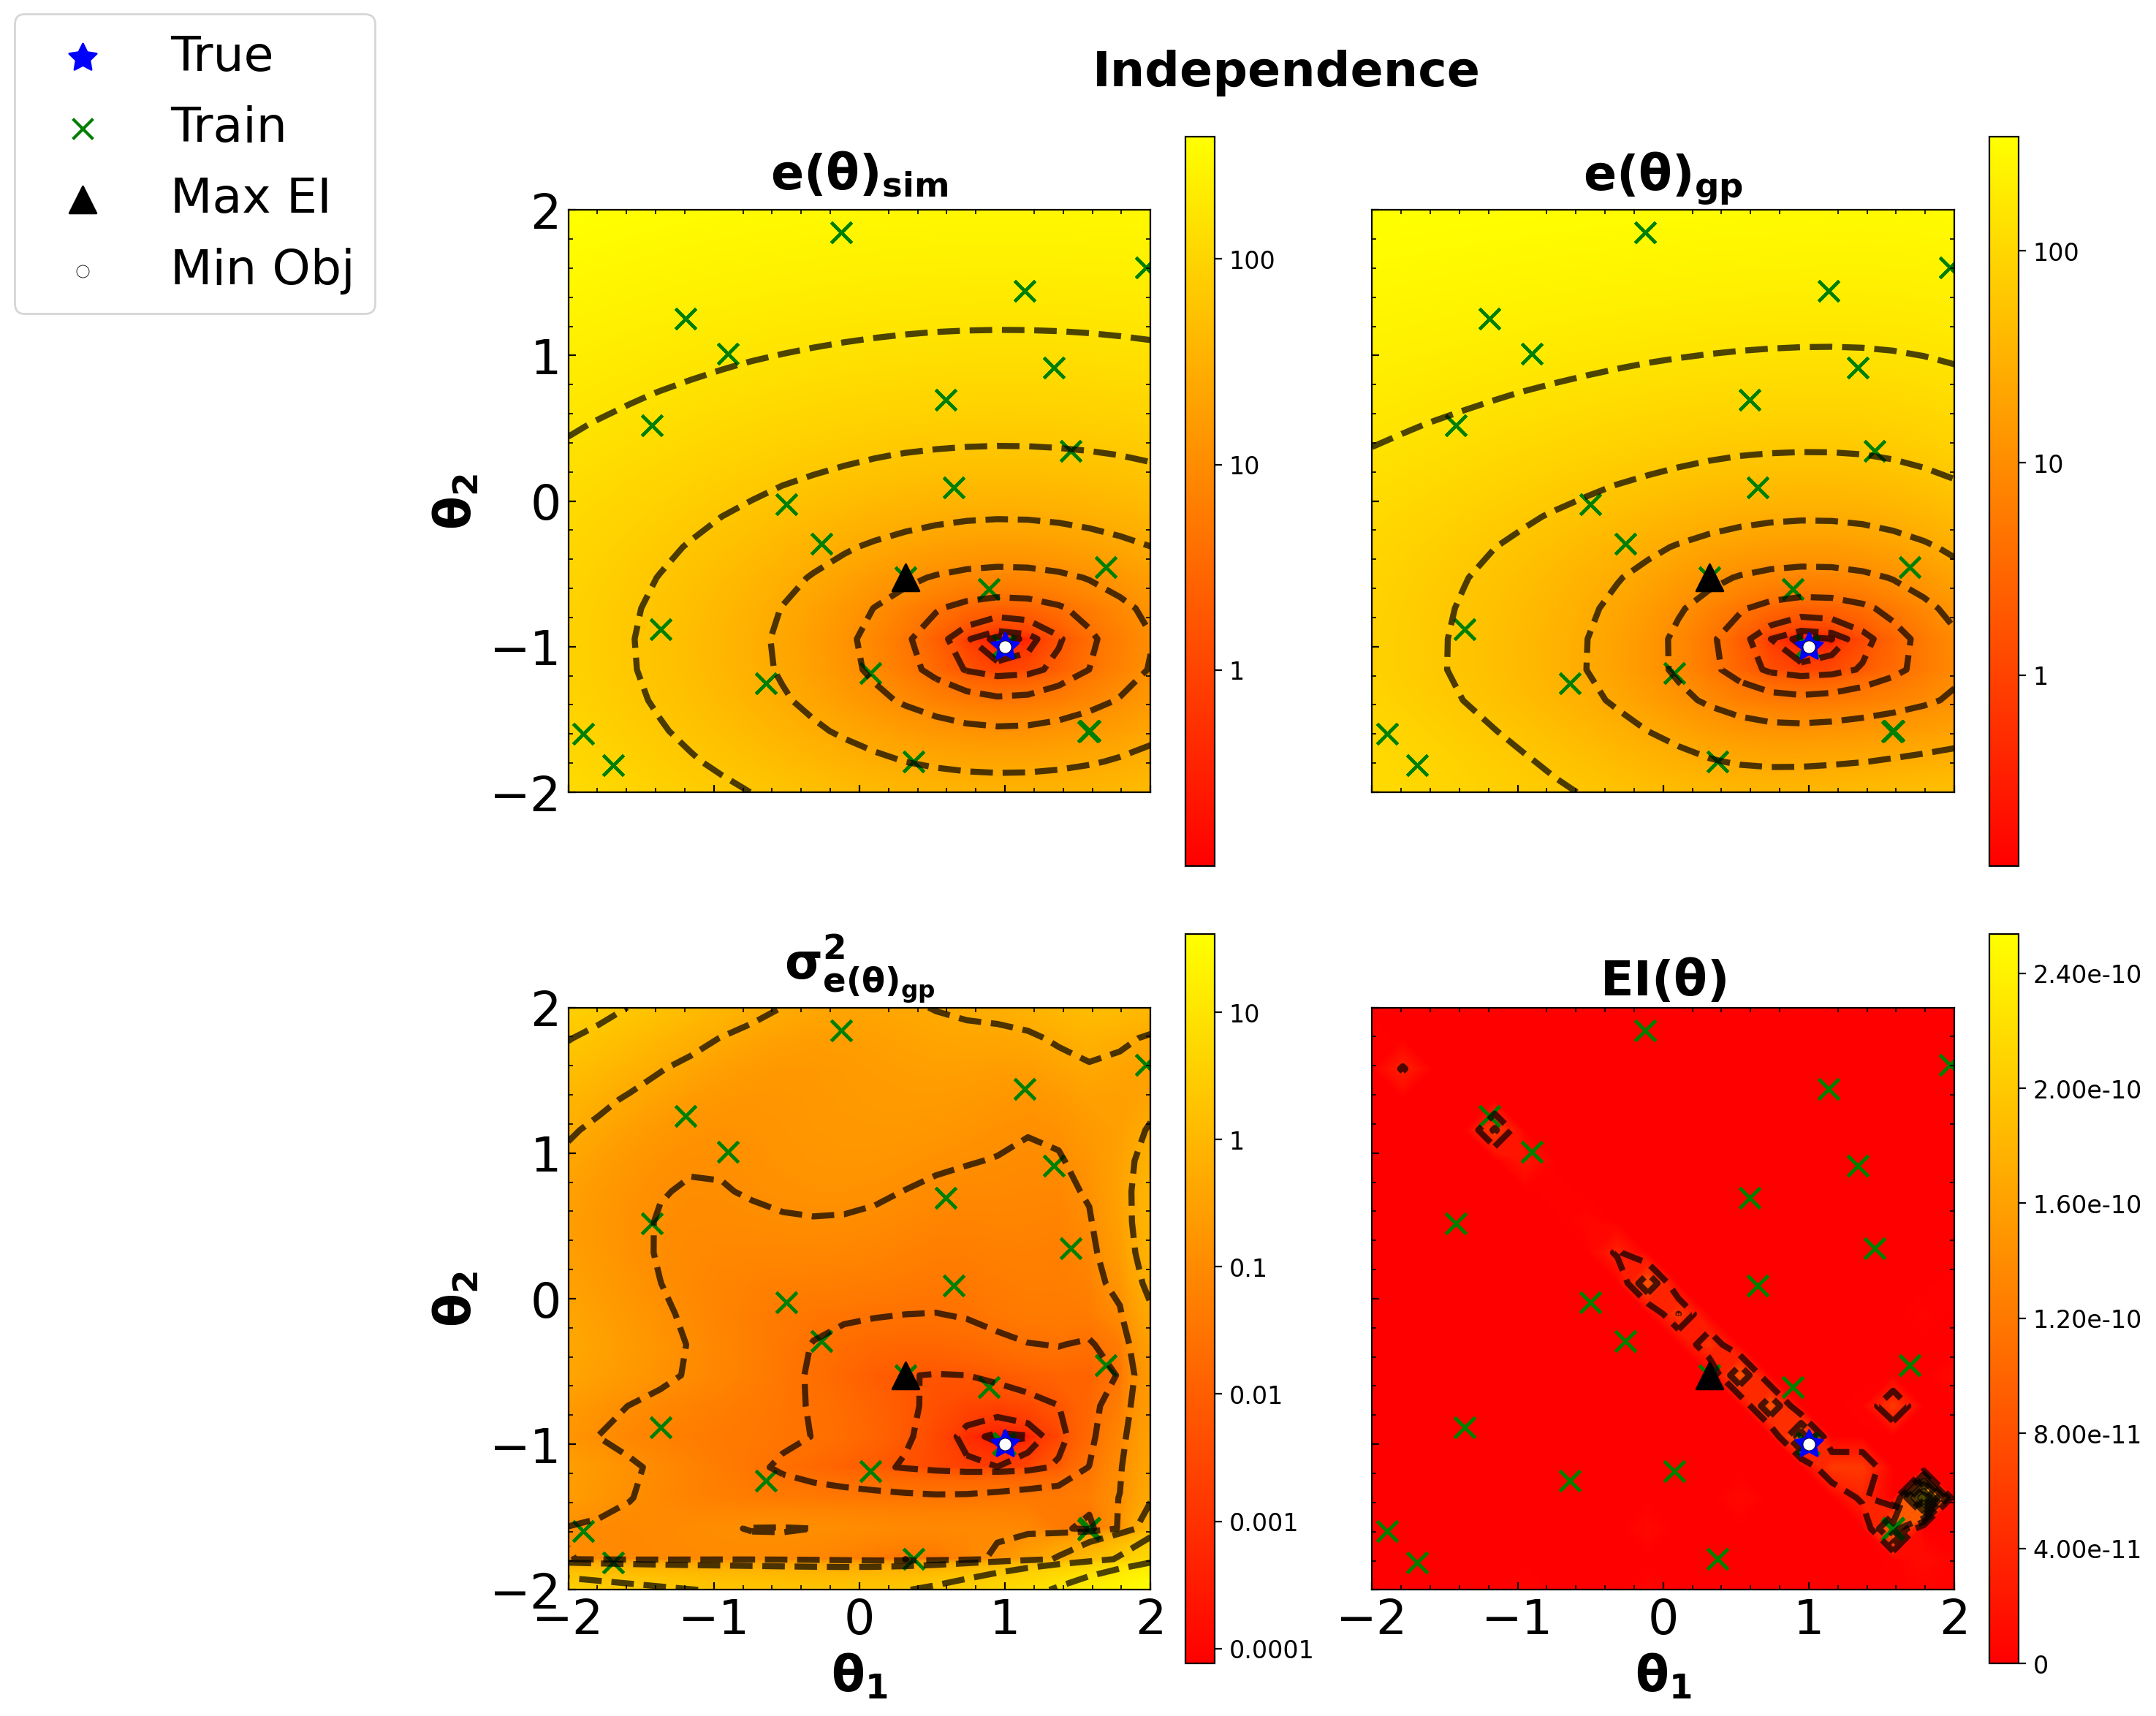

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\log_independence\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_2_iter_40


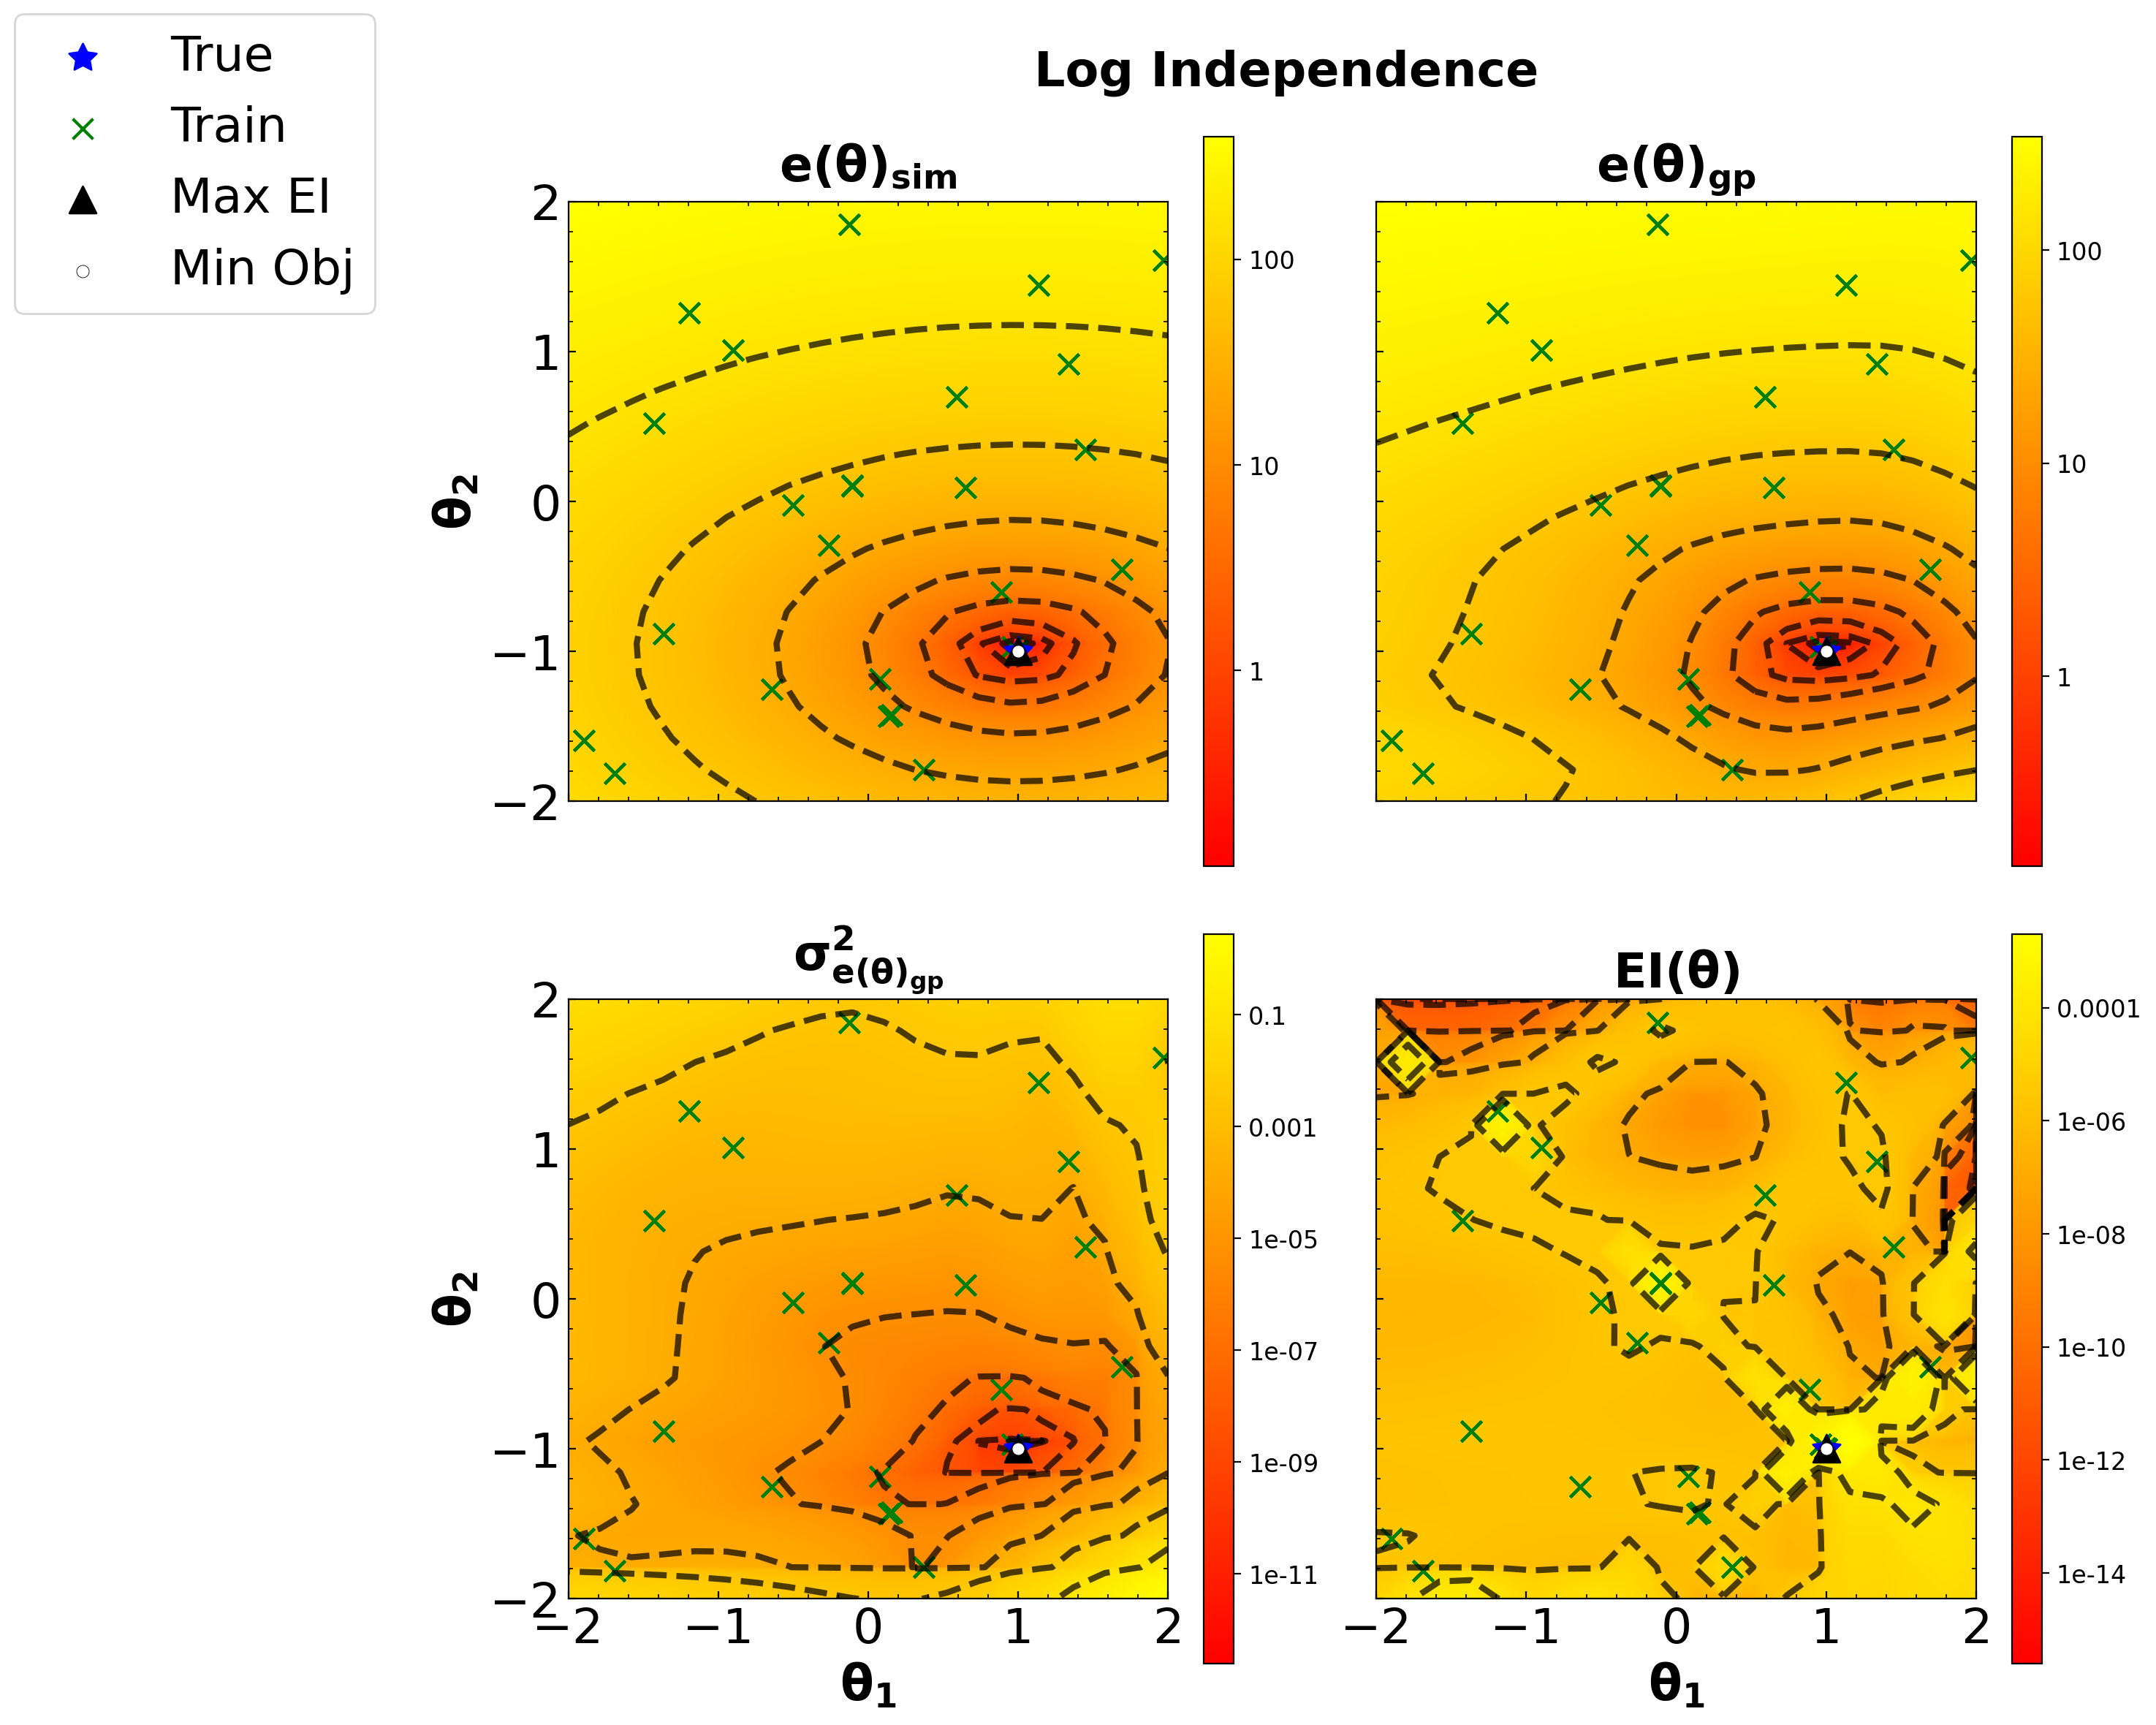

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\sparse_grid\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_4_iter_20


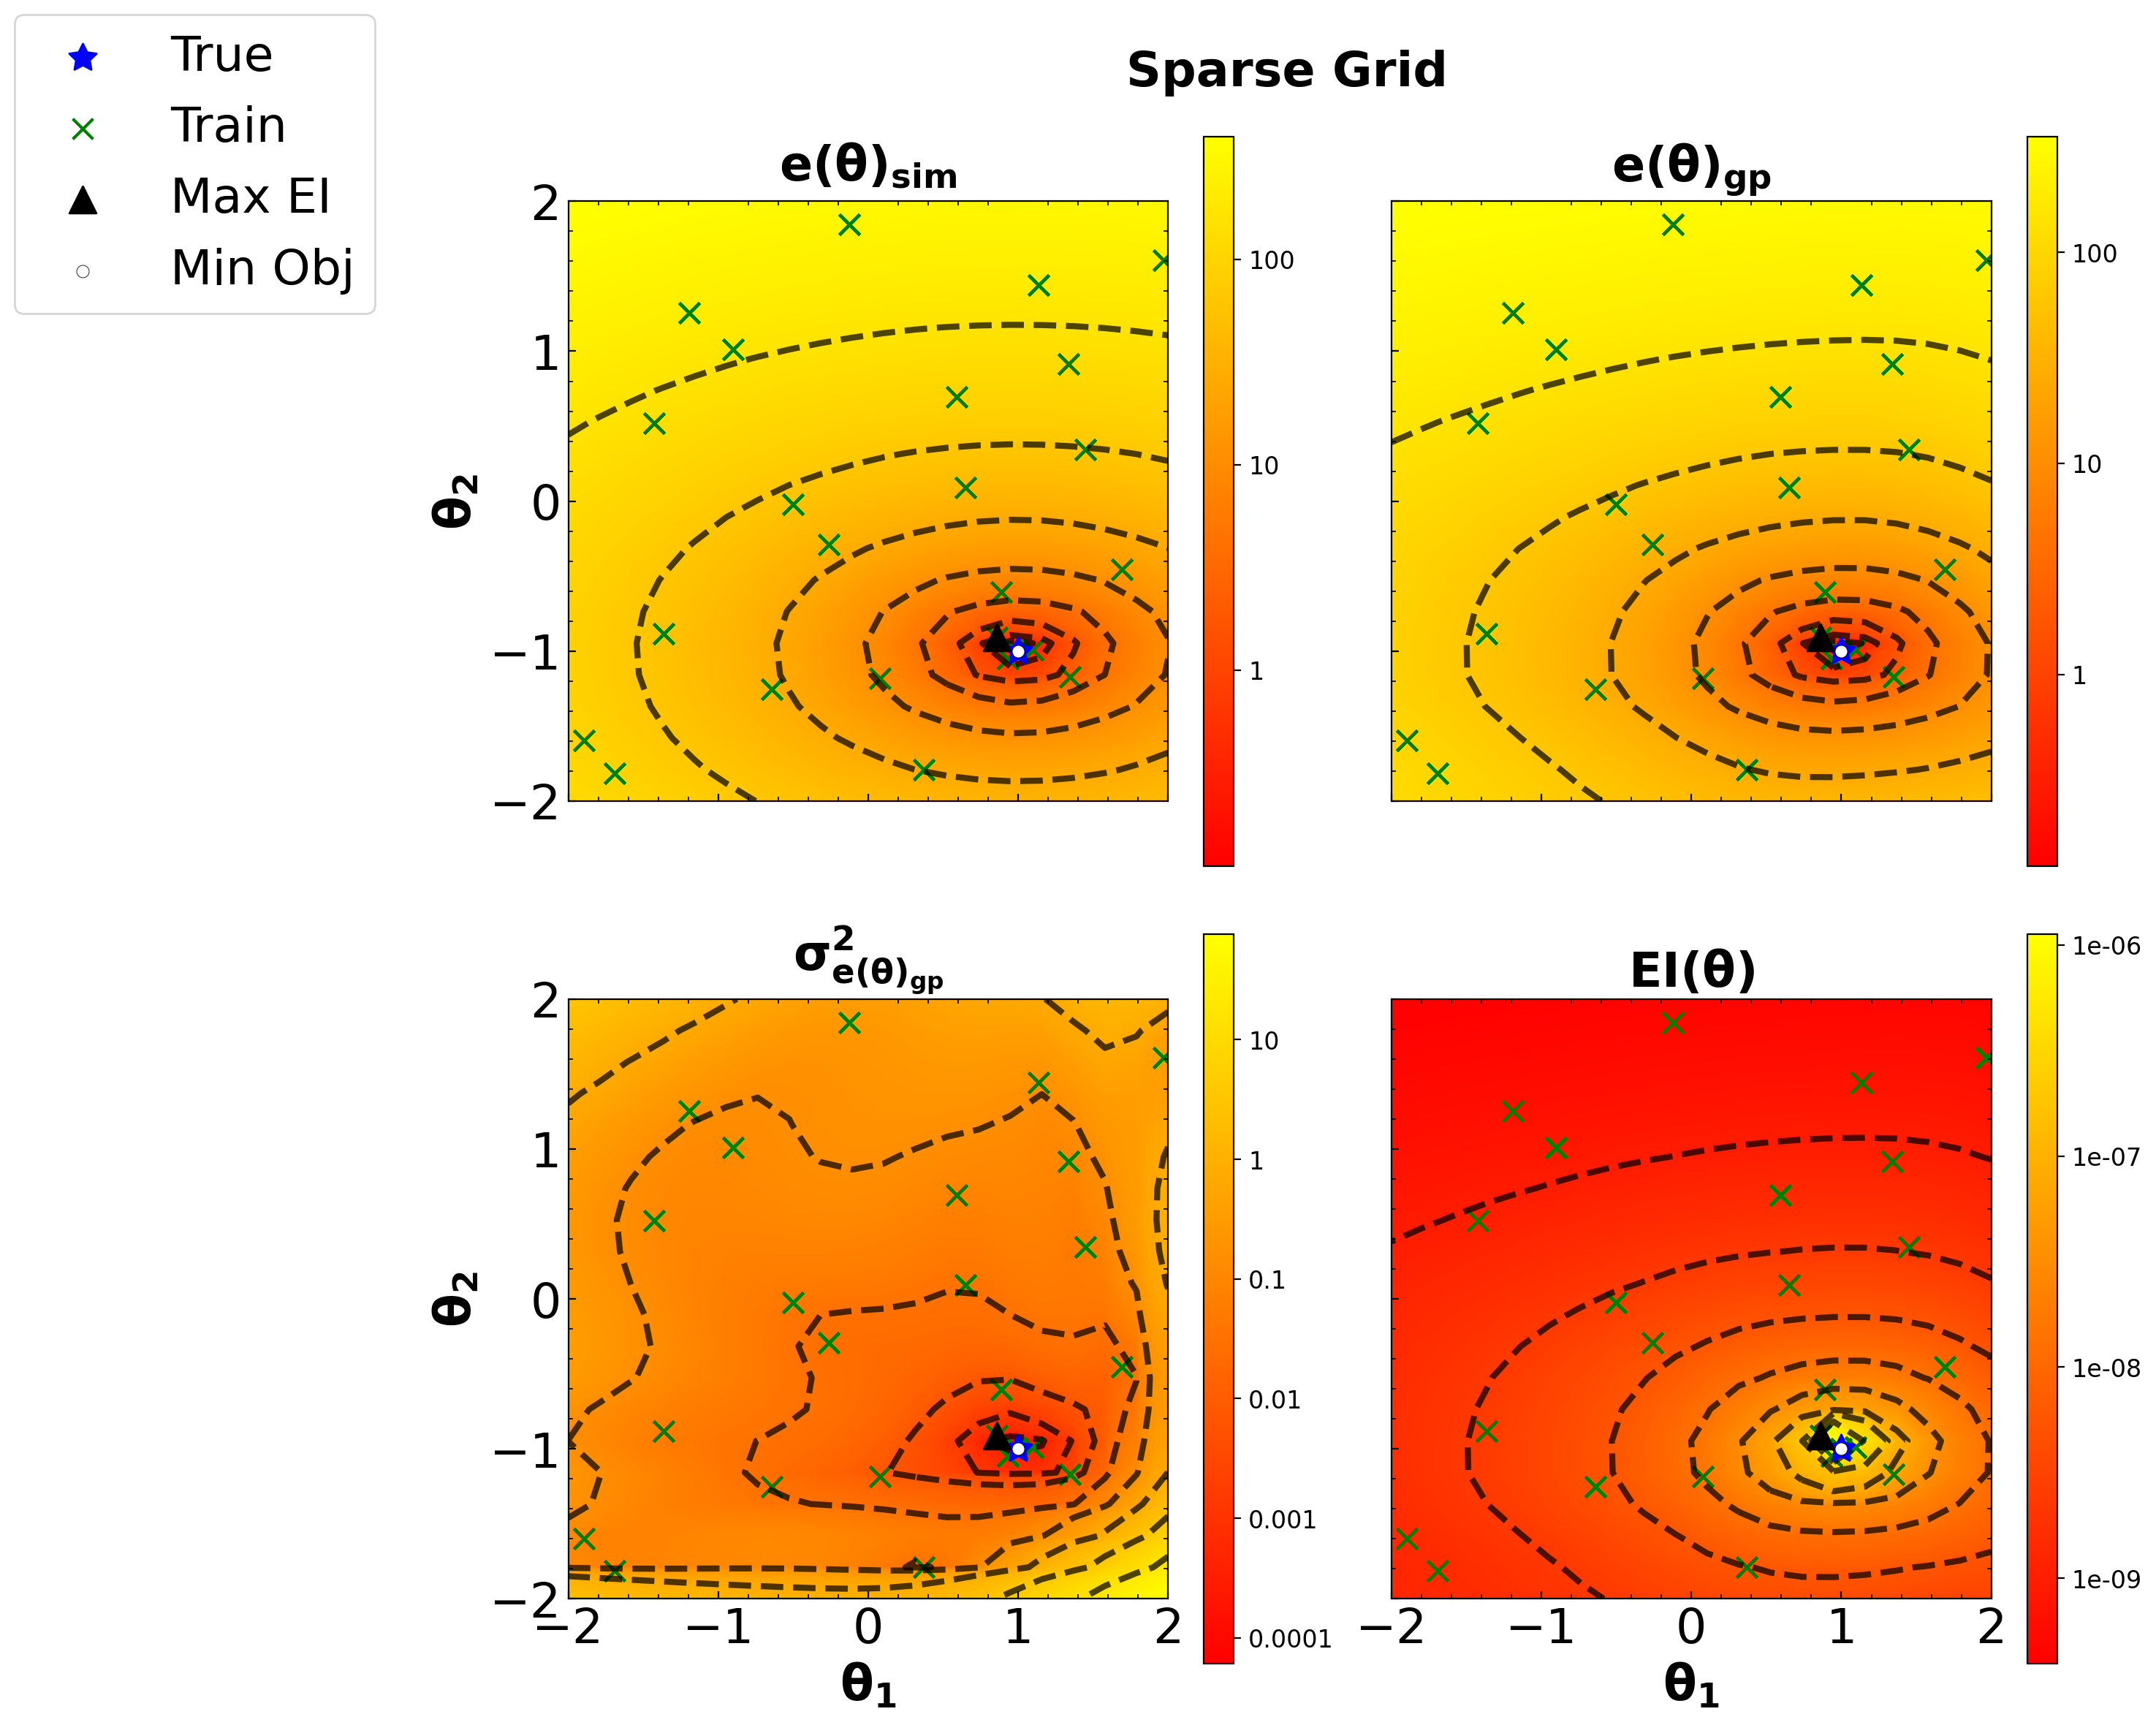

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\monte_carlo\theta_1-theta_2\sse_sim_sse_mean_sse_var_ei\run_1_iter_19


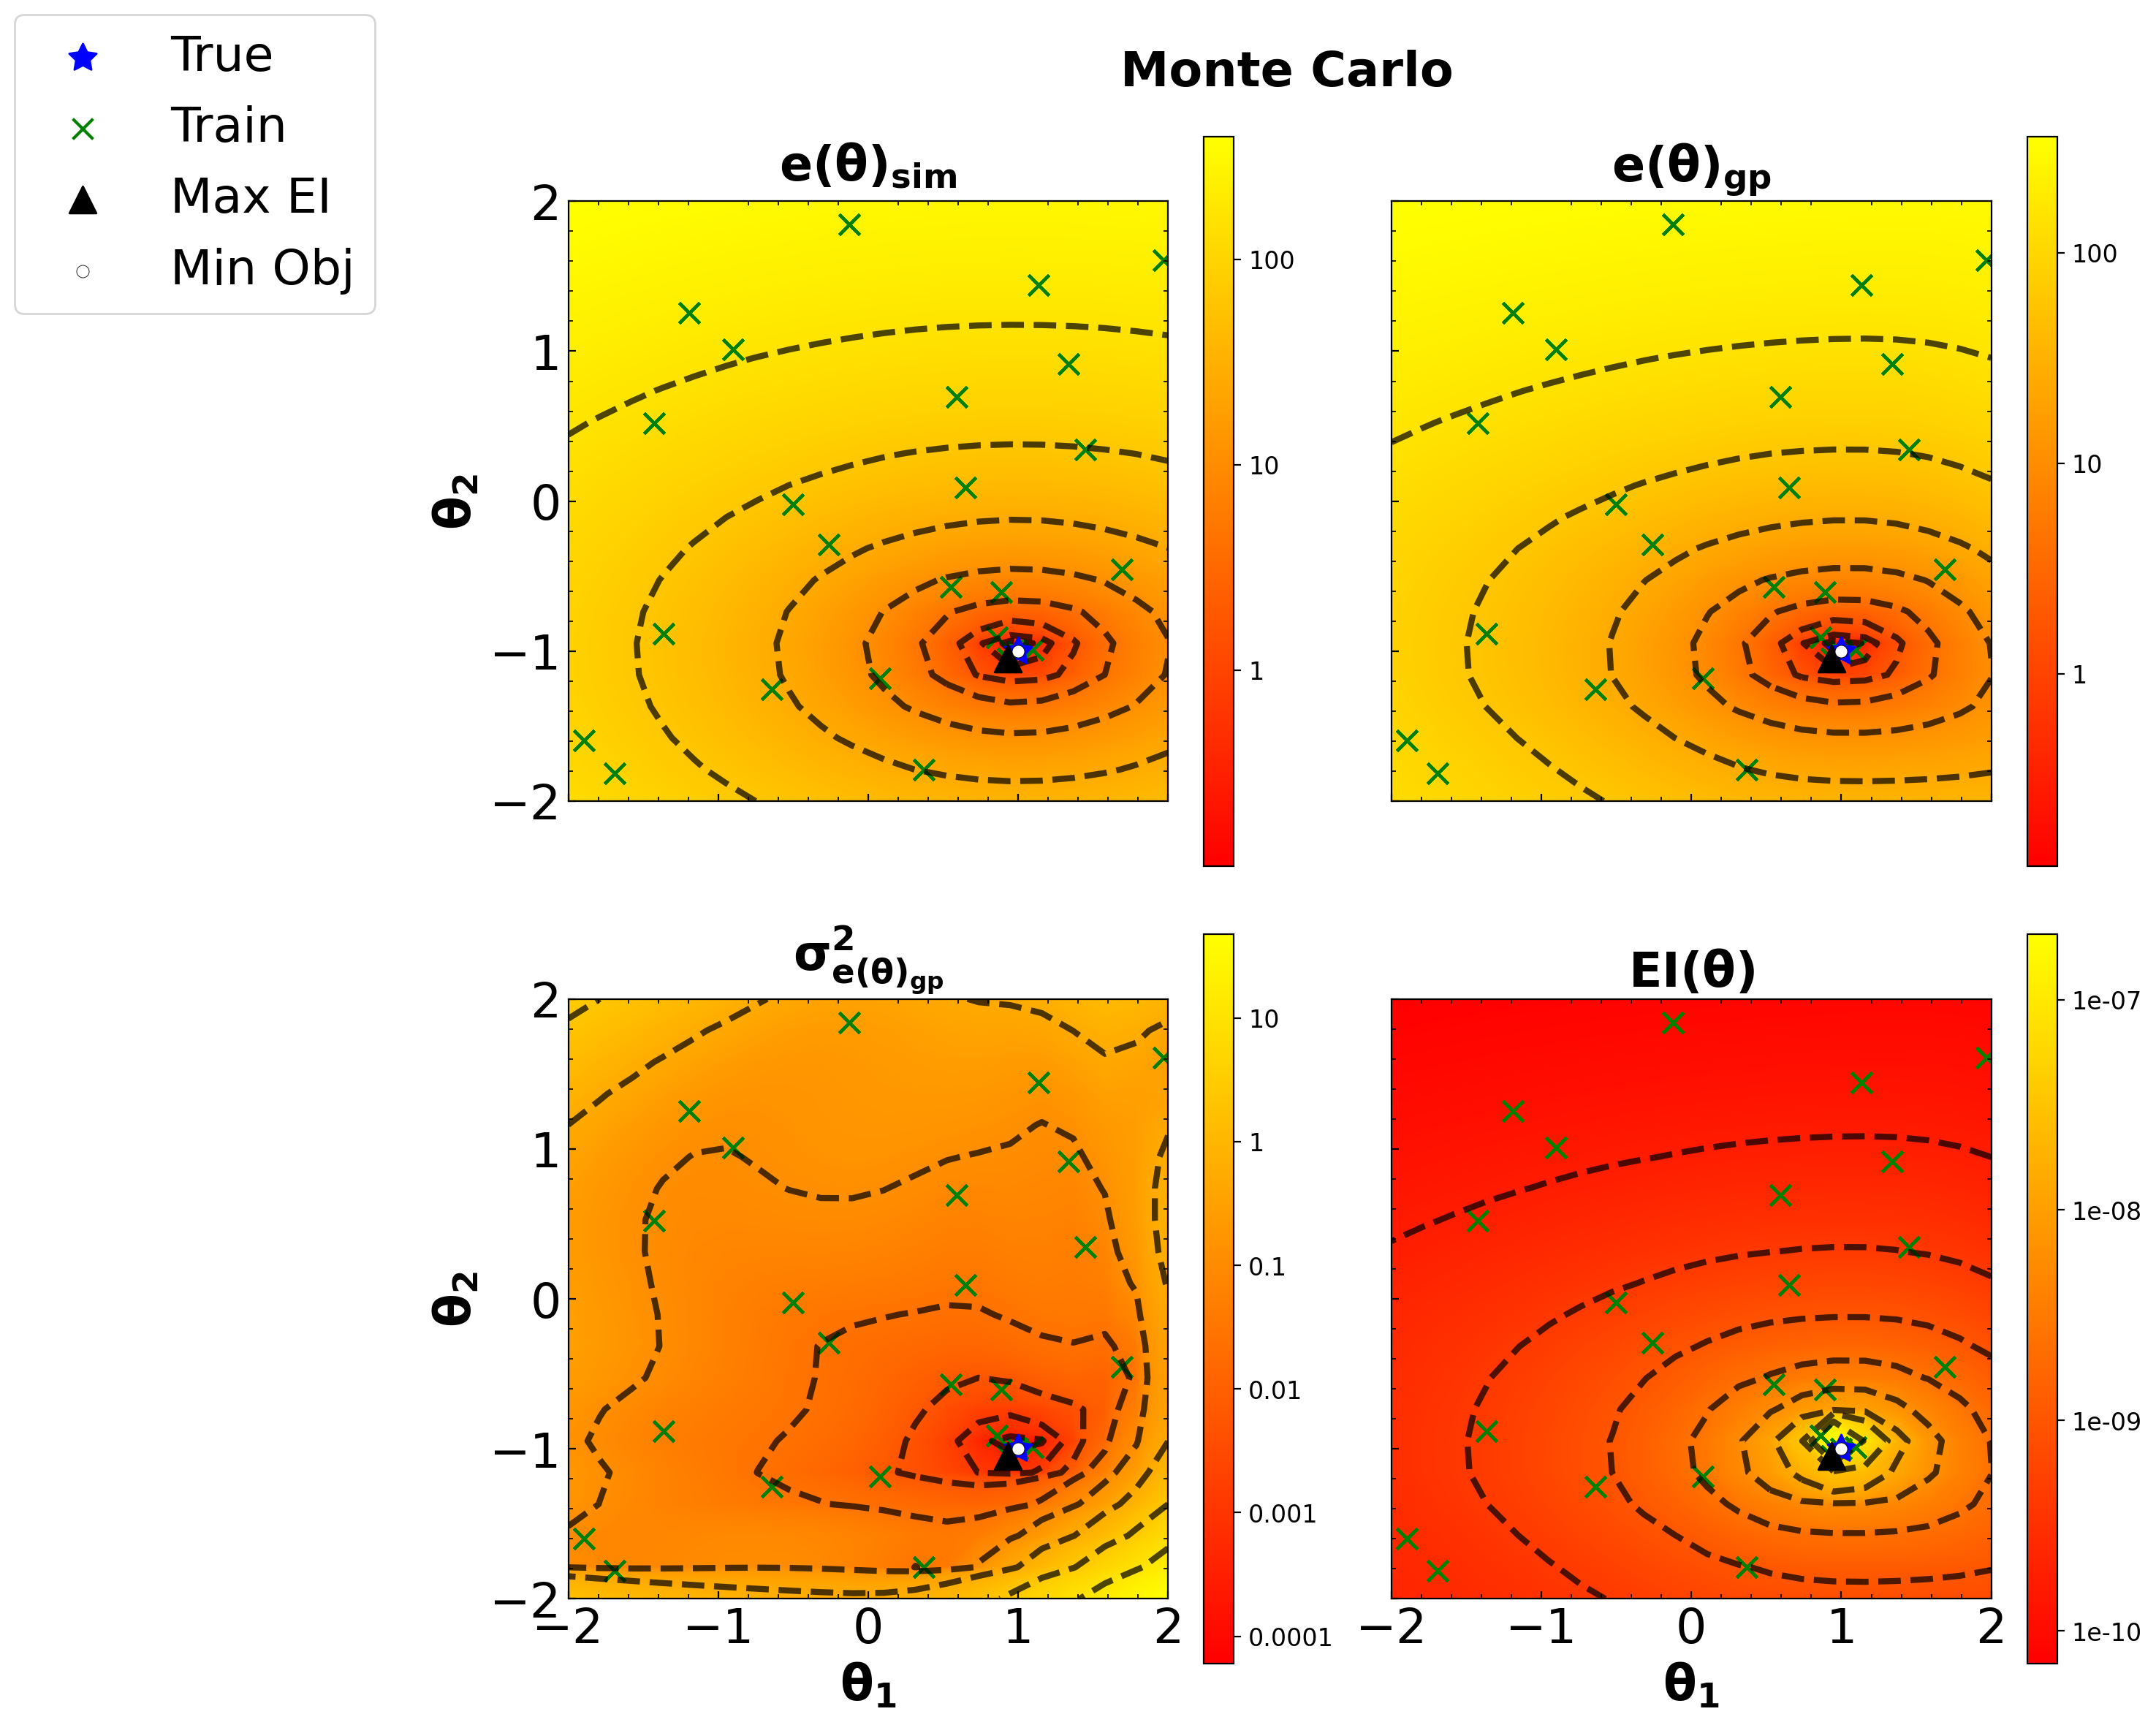

In [5]:
#Make Heat maps for all pairs
z_choices = ["sse_sim", "sse_mean", "sse_var", "ei"]
levels = [100,100,100,100]

#Loop over best jobs
for i in range(len(job_list_best)):   
    #Set file path
    file_path = job_list_best[i].fn("BO_Results.gz")
    #Back out number of parameters
    string_val = df_best["Theta Min Obj"].iloc[0]
    try:
        numbers = [float(num) for num in string_val.replace('[', '').replace(']', '').split()]
    except:
        numbers = [float(num) for num in string_val]
        
    #Create list of parameter pair combinations
    dim_theta = len(np.array(numbers).reshape(-1, 1))
    dim_list = np.linspace(0, dim_theta-1, dim_theta)
    pairs = len((list(combinations(dim_list, 2))))
    
    #Loop over parameter pairs
    for pair in range(pairs):
        #Set save path
        save_path = make_dir_name_from_criteria(criteria_dict)
        plot_dict = make_plot_dict(False, None, None, None, line_levels = levels, save_path=save_path)
        plot_hms_gp_compare(file_path, run_num_list[i], bo_iter_list[i], pair, z_choices, plot_dict)

c:\Users\mcarlozo\Documents\Repos\Toy_Problem\bo_methods_lib\bo_methods_lib\GPBO_Classes_plotters.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\heat_maps\theta_1-theta_2\sse_mean


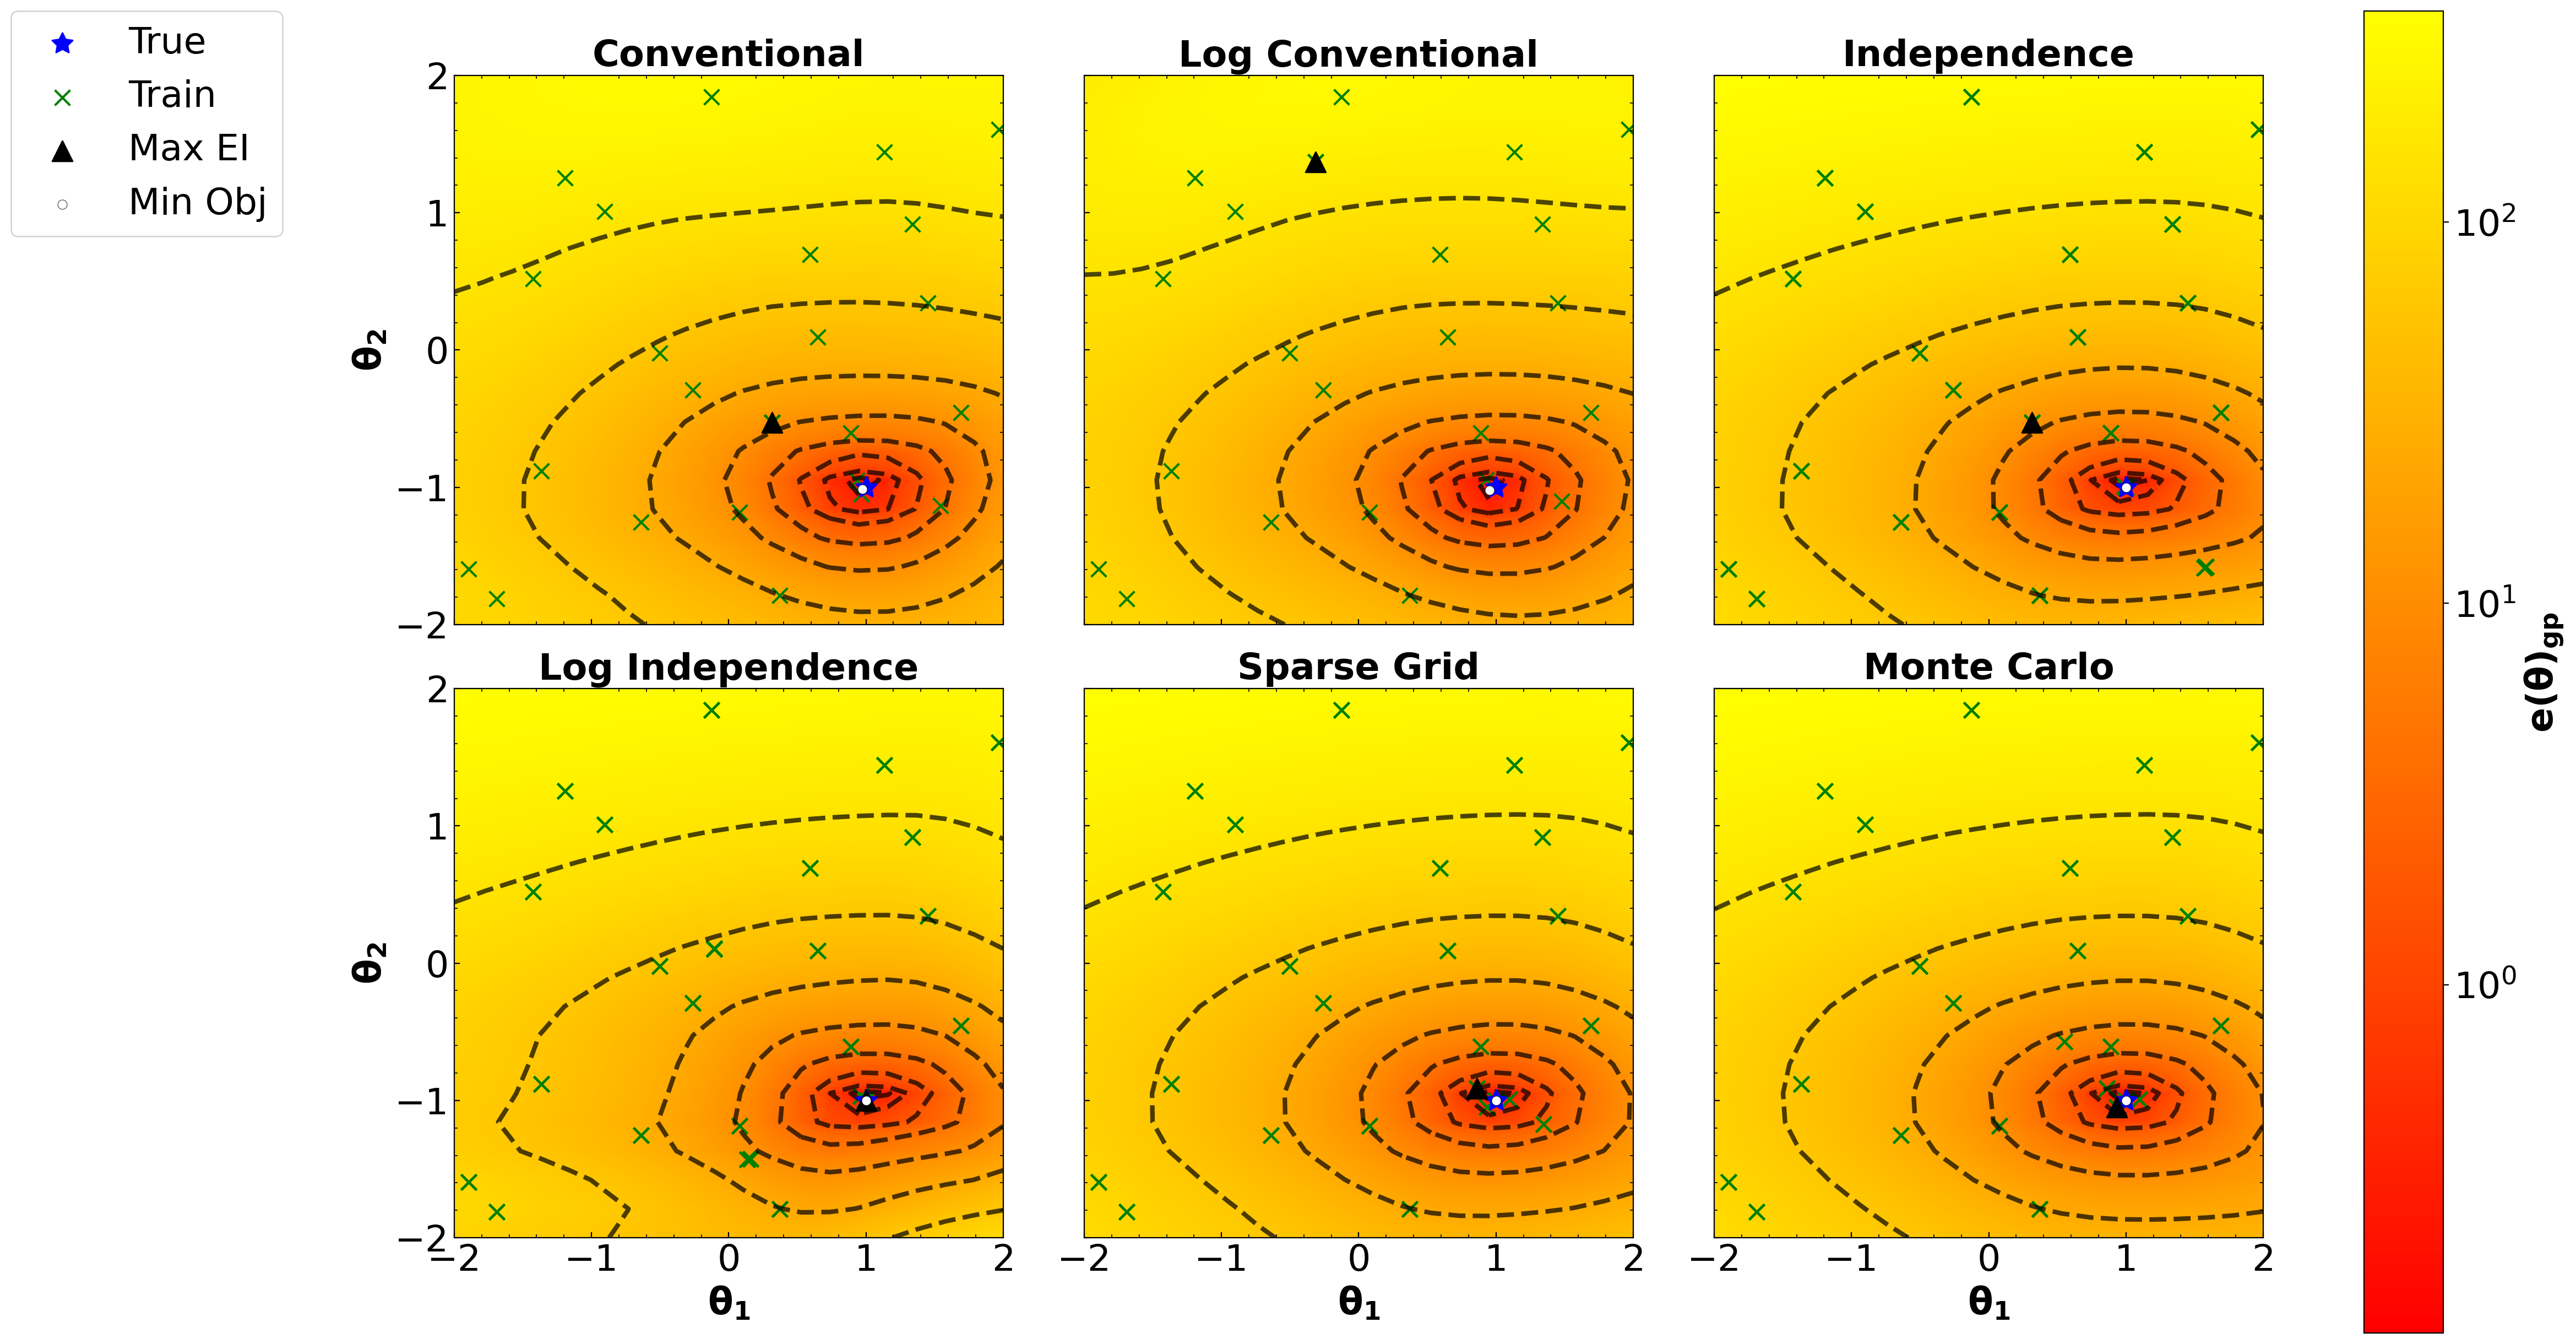

In [6]:
pair = 0
z_choice = "sse_mean"
# title = "Heat Map Pair " + z_choice
levels = [100,100,100, 100, 100, 100]
save_path = make_dir_name_from_criteria(criteria_dict)
plot_dict = make_plot_dict(False, None, None, None, line_levels = levels, save_path=save_path)
file_path_list = [job.fn("BO_Results.gz") for job in job_list_best]

plot_hms_all_methods(file_path_list, run_num_list, bo_iter_list, pair, z_choice, plot_dict)

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\line_plots\all_meth_1_obj\ei


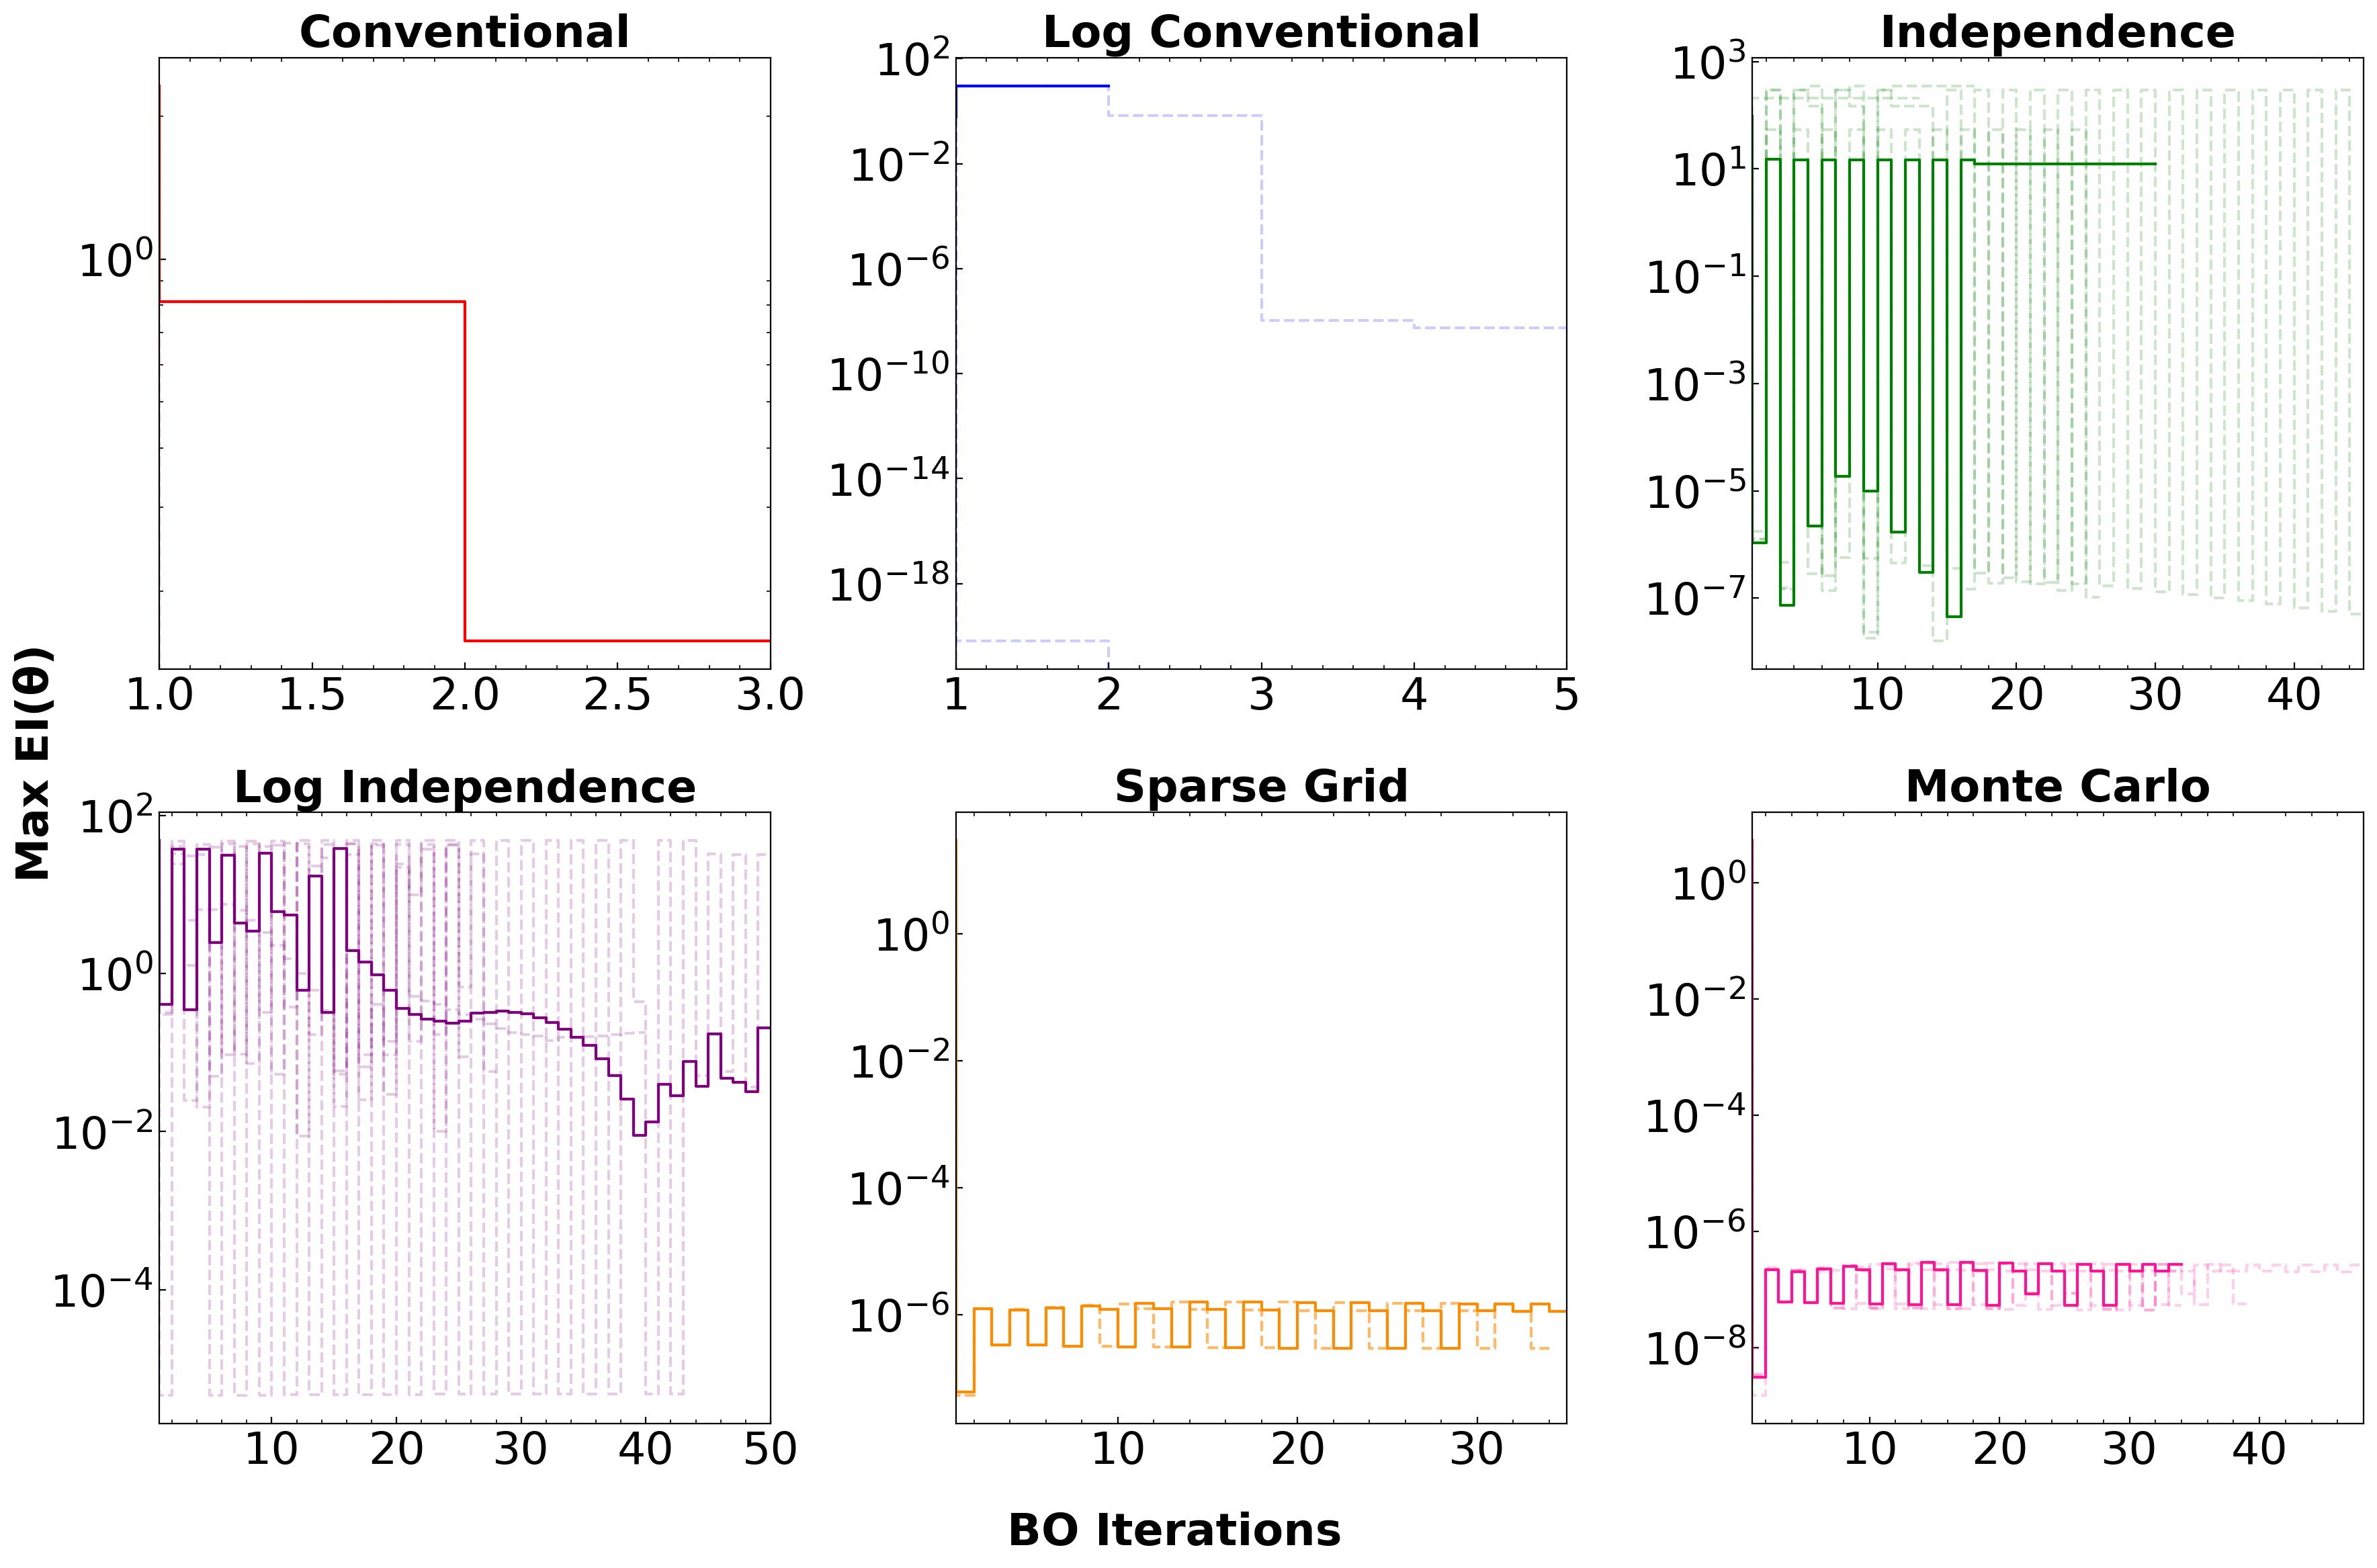

In [7]:
z_choice = "ei"

x_label = "BO Iterations"
# y_label = r"$\mathbf{e(\theta)}$"
y_label = "Max " + r"$\mathbf{EI(\theta)}$"
# title = "Min SSE Values"
save_path = make_dir_name_from_criteria(criteria_dict)
plot_dict = make_plot_dict(False, None, x_label, y_label, line_levels = None, save_path=save_path)

file_path_list = [job.fn("BO_Results.gz") for job in job_list]

plot_one_obj_all_methods(file_path_list, run_num_list, z_choice, plot_dict)

Results\cs_name_val_1/ep_enum_val_1/meth_name_val_in_1_2_3_4_5_6\line_plots\all_meth_mult_obj\sse_min_sse_ei


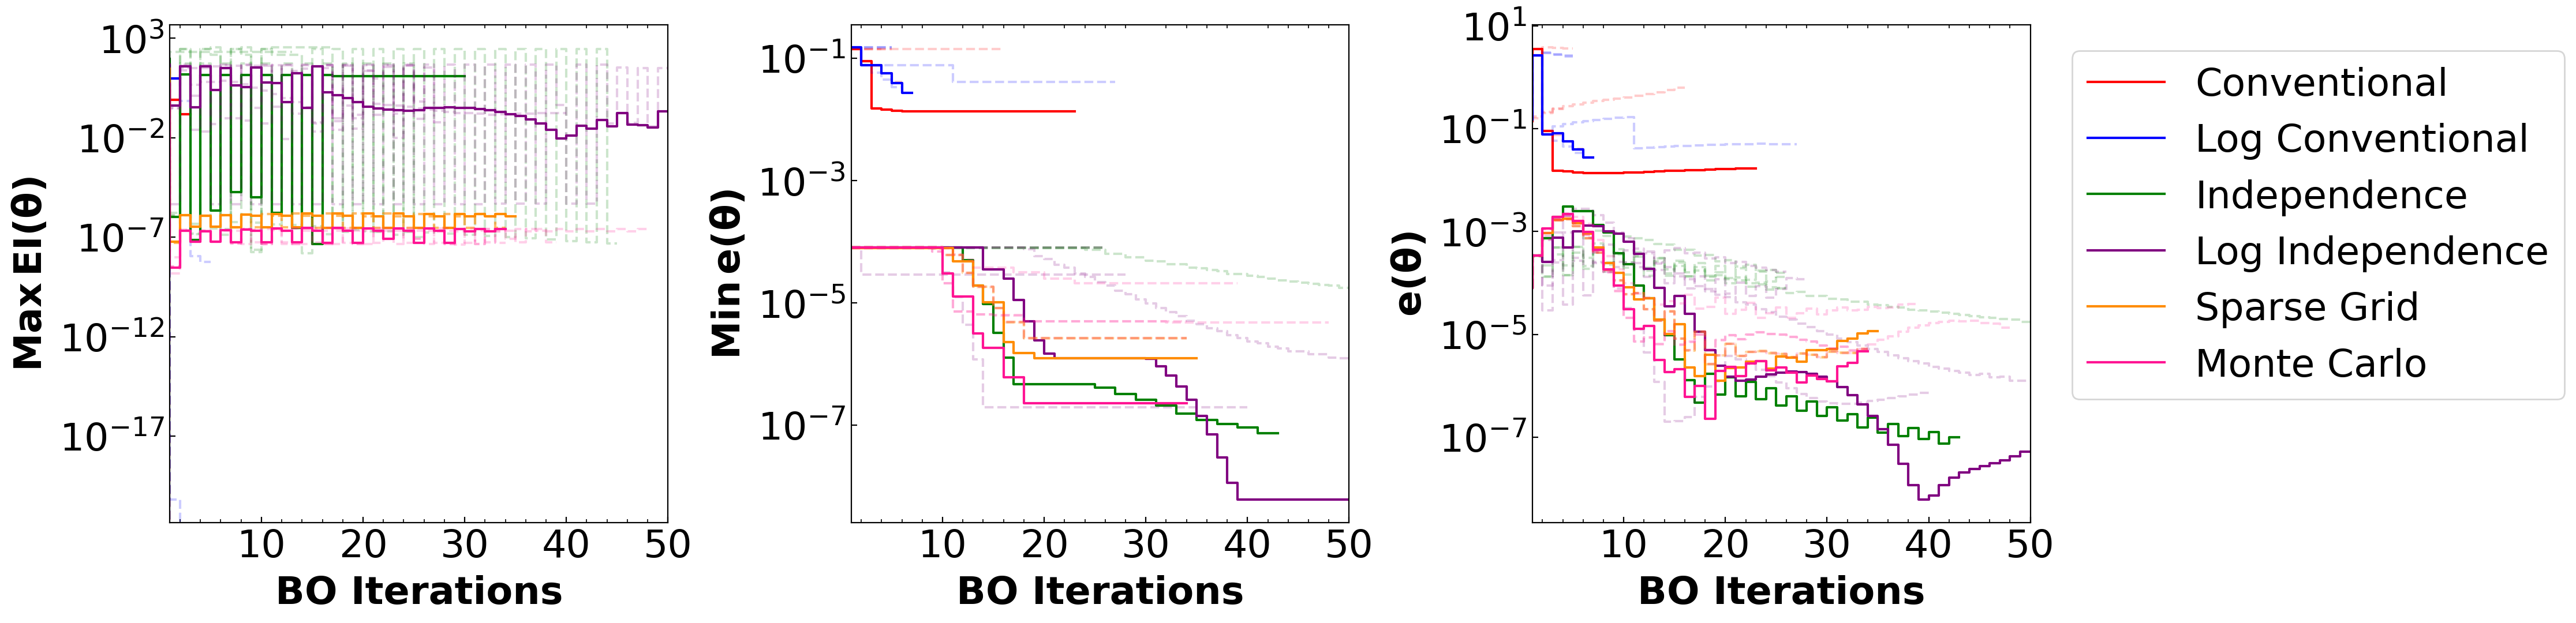

In [8]:
z_choices = ["ei", "min_sse", "sse"]

x_label = "BO Iterations"
y_label = r"$\mathbf{e(\theta)}$"
# y_label = "Max " + r"$\mathbf{EI(\theta)}$"
save_path = make_dir_name_from_criteria(criteria_dict)
plot_dict = make_plot_dict(False, None, x_label, None, line_levels = None, save_path=save_path)

file_path_list = [job.fn("BO_Results.gz") for job in job_list_best]

plot_objs_all_methods(file_path_list, run_num_list, z_choices, plot_dict)

workspace/811c3b5e401ba0adcedd67a67dbf2457\line_plots\hyperparams


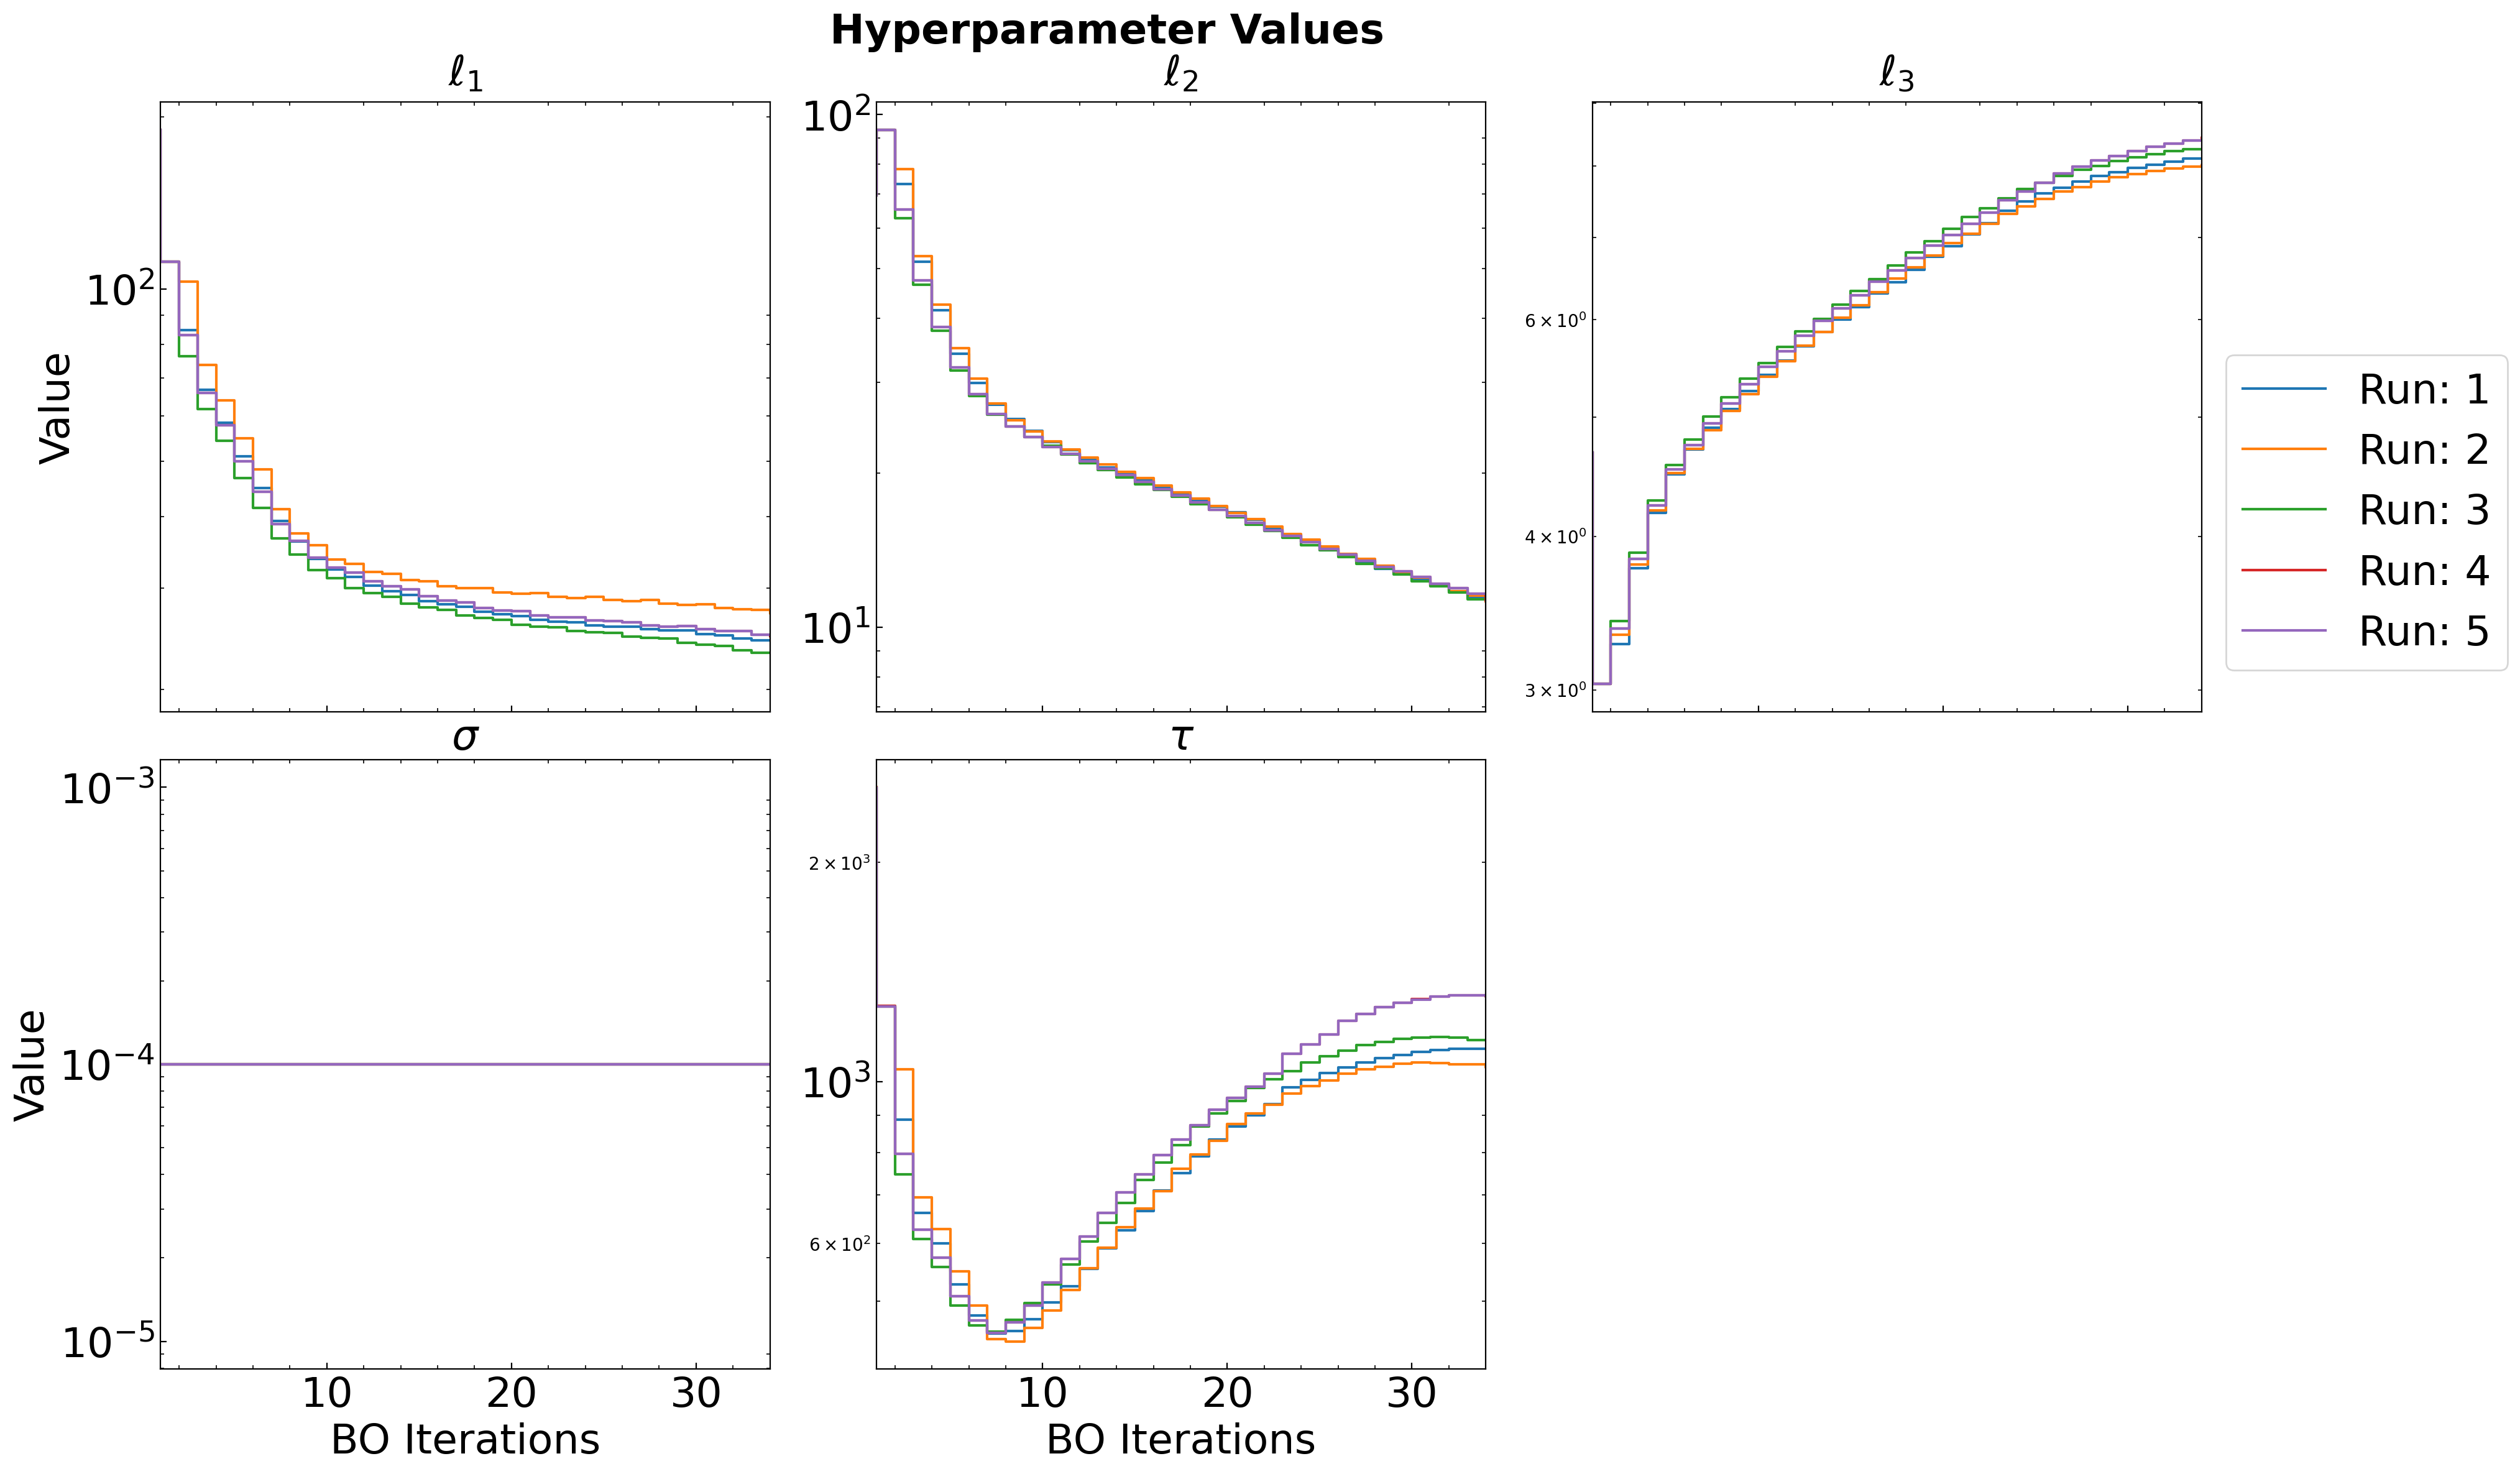

In [9]:
#Get HP Plots
#Set parameters
file_path = "2023/09/05/Data_Files/CS2_BO_method_C2_ep_method_BOYLE.pickle"
file_path = "2023/09/05/Data_Files/CS2_BO_method_B1_ep_method_CONSTANT.pickle"
file_path = "workspace/811c3b5e401ba0adcedd67a67dbf2457/BO_Results.gz"

x_label = "BO Iterations"
y_label = "Value"
title = "Hyperparameter Values"

save_path = os.path.join(os.path.dirname(file_path), "line_plots", "hyperparams")
plot_dict = make_plot_dict(False, title, x_label, y_label, ybins = 7, line_levels = None, save_path=save_path)

hps, hp_names, hp_true = analyze_hypers(file_path, save_csv = True)
plot_2D_Data_w_BO_Iter(hps, hp_names, hp_true, plot_dict)

workspace/811c3b5e401ba0adcedd67a67dbf2457\line_plots\sse_min_sse_ei


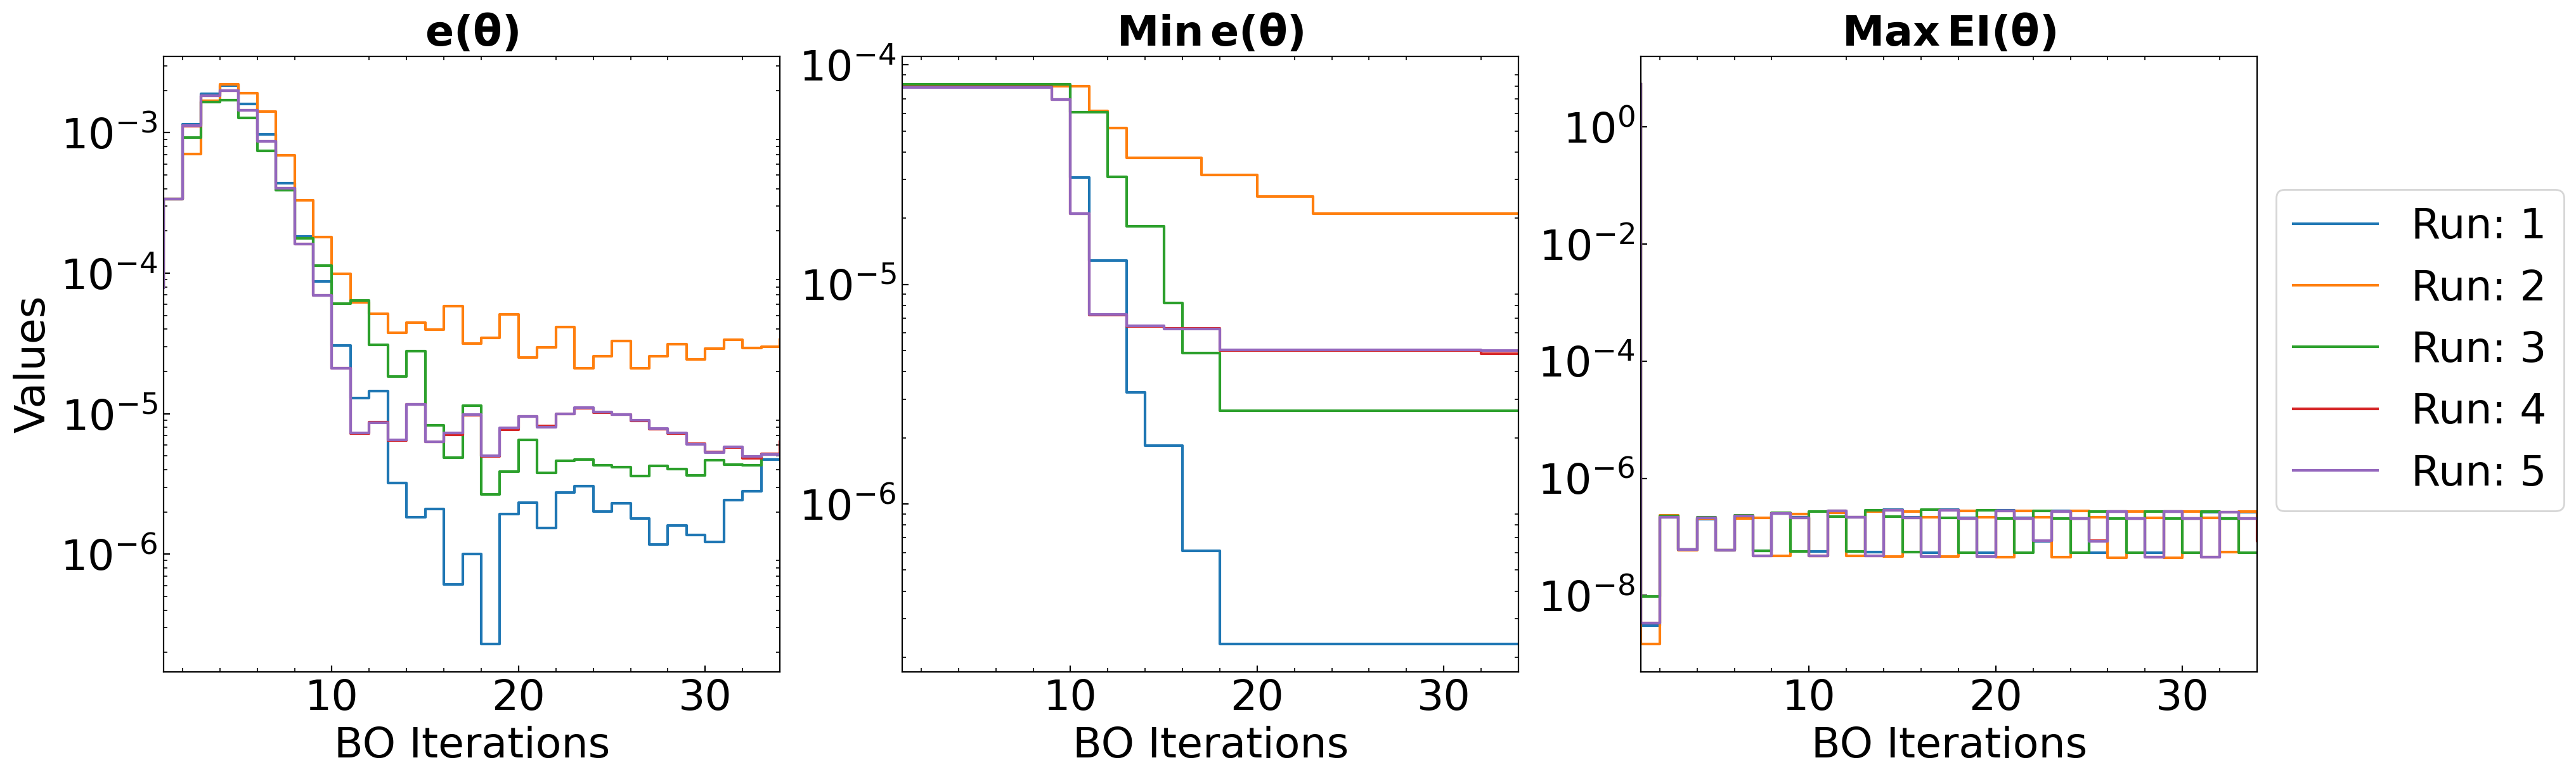

In [10]:
#Get sse, log_sse, and ei plots
file_path = "workspace/811c3b5e401ba0adcedd67a67dbf2457/BO_Results.gz" #CS1 2D Best

z_choices = ["sse", "min_sse", "ei"]
z_choices_sort = sorted(z_choices, key=lambda x: ("sse", "min_sse", "ei").index(x))

x_label = "BO Iterations"
y_label = "Values"
title = None

save_path = os.path.join(os.path.dirname(file_path), "line_plots", '_'.join(map(str, z_choices_sort)))
plot_dict = make_plot_dict(False, title, x_label, y_label, ybins = 7, line_levels = None, save_path=save_path)

data, data_names, data_true, GP_meth_val = analyze_sse_min_sse_ei(file_path, z_choices)
plot_2D_Data_w_BO_Iter(data, data_names, data_true, plot_dict)

workspace/811c3b5e401ba0adcedd67a67dbf2457\line_plots\sse_params


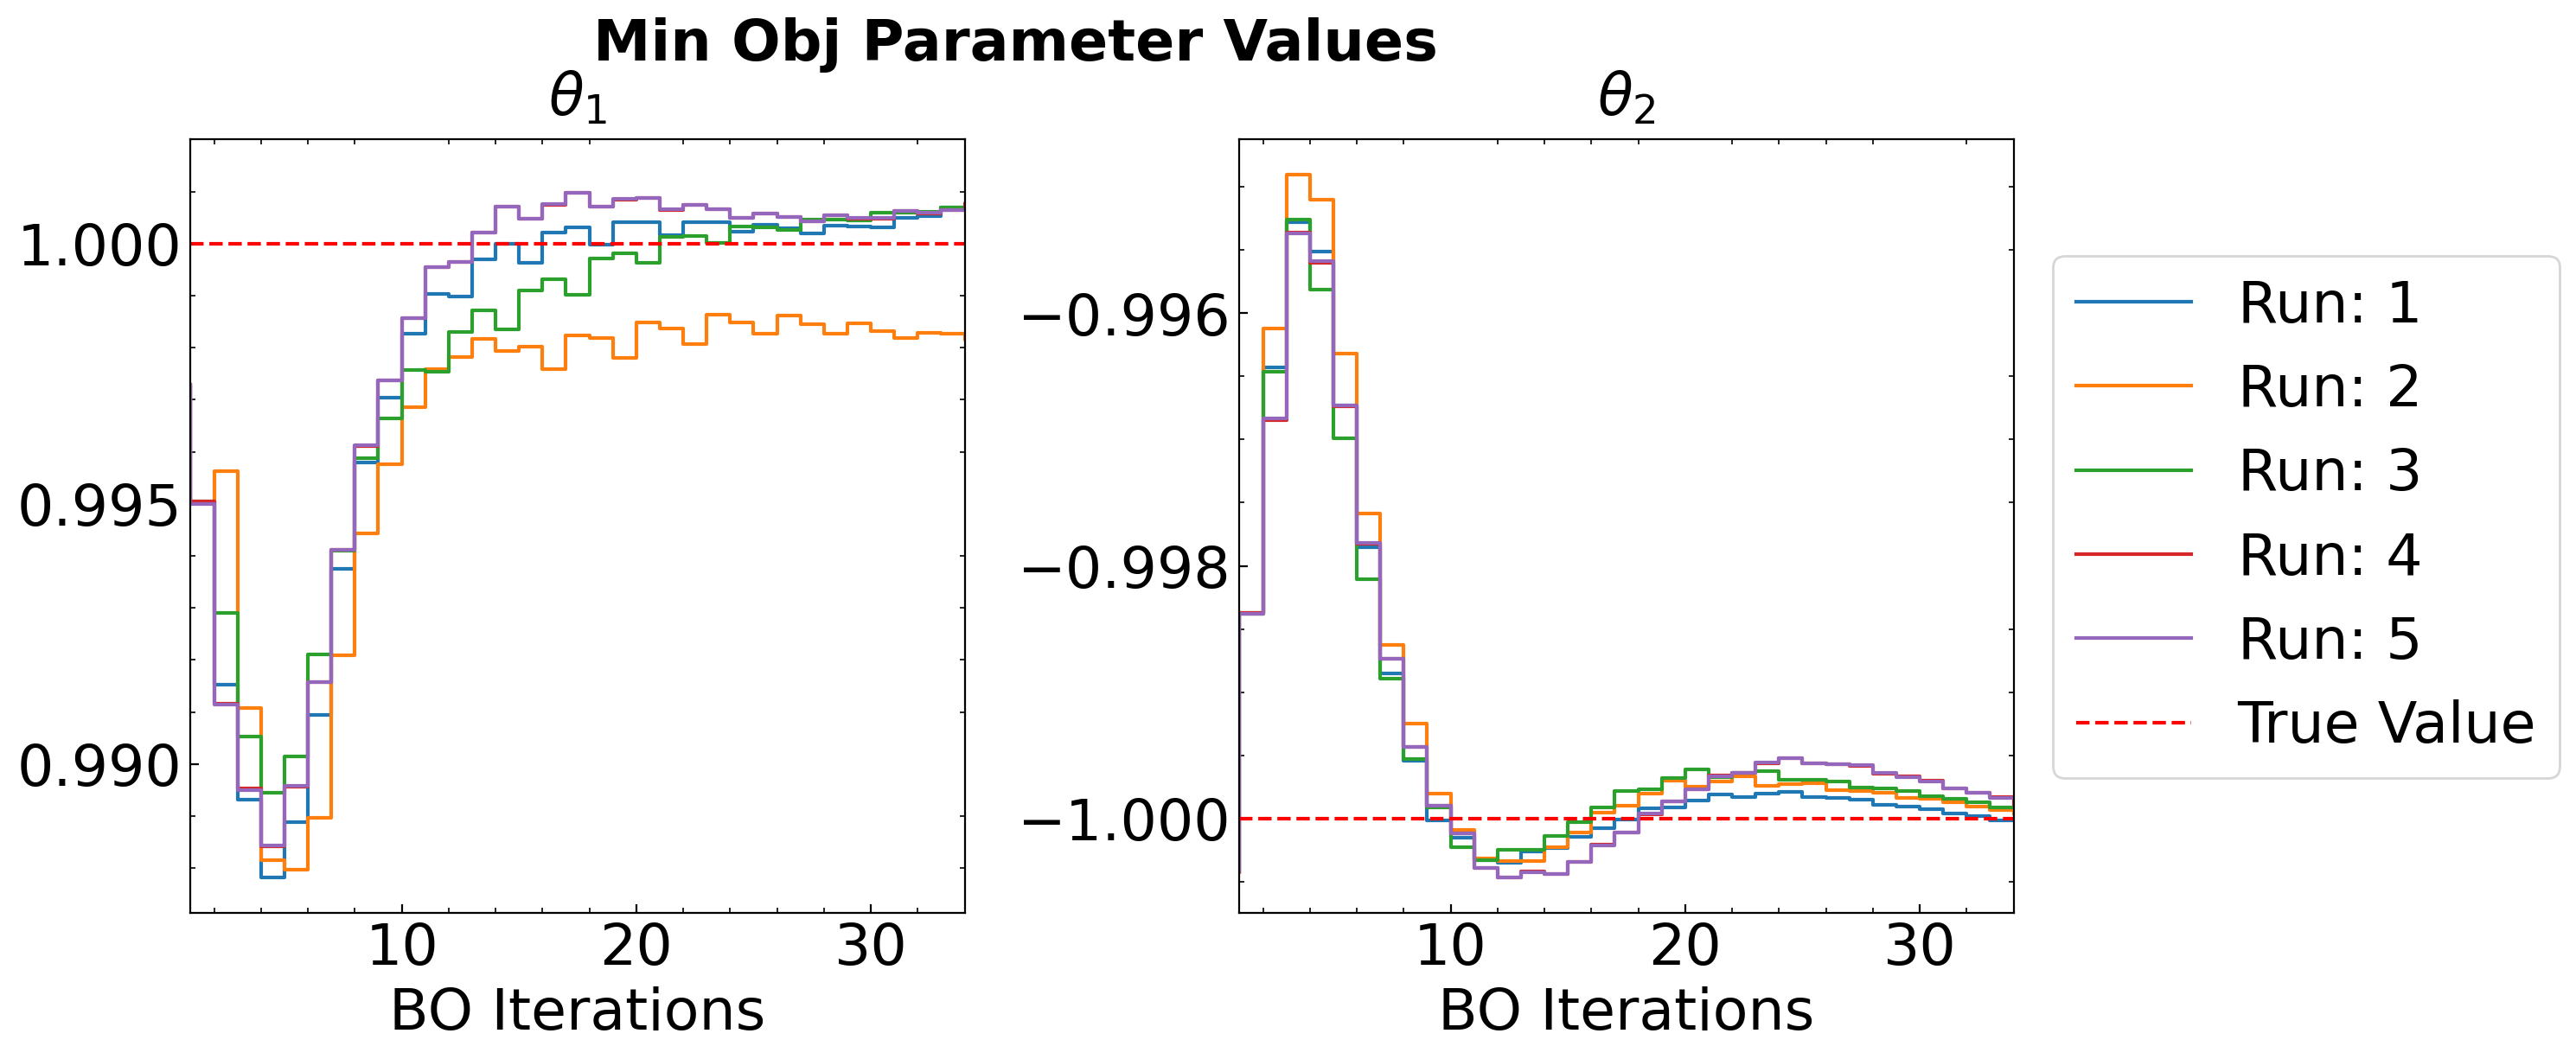

In [11]:
#Get theta @ min sse
file_path = "2023/08/28/Data_Files/CS1_meth_A2_sep_fact_1.0.pickle"
file_path = "2023/09/05/Data_Files/CS2_BO_method_C2_ep_method_BOYLE.pickle"
file_path = "2023/09/05/Data_Files/CS2_BO_method_B1_ep_method_CONSTANT.pickle"
file_path = "workspace/811c3b5e401ba0adcedd67a67dbf2457/BO_Results.gz"

z_choice = "sse"

x_label = "BO Iterations"
title = "Min Obj Parameter Values"

save_path = os.path.join(os.path.dirname(file_path), "line_plots", z_choice + "_params")
plot_dict = make_plot_dict(False, title, x_label, None, line_levels = None, save_path=save_path)

data, data_names, data_true = analyze_thetas(file_path, z_choice)
plot_2D_Data_w_BO_Iter(data, data_names, data_true, plot_dict)

workspace/811c3b5e401ba0adcedd67a67dbf2457\line_plots\min_sse_params


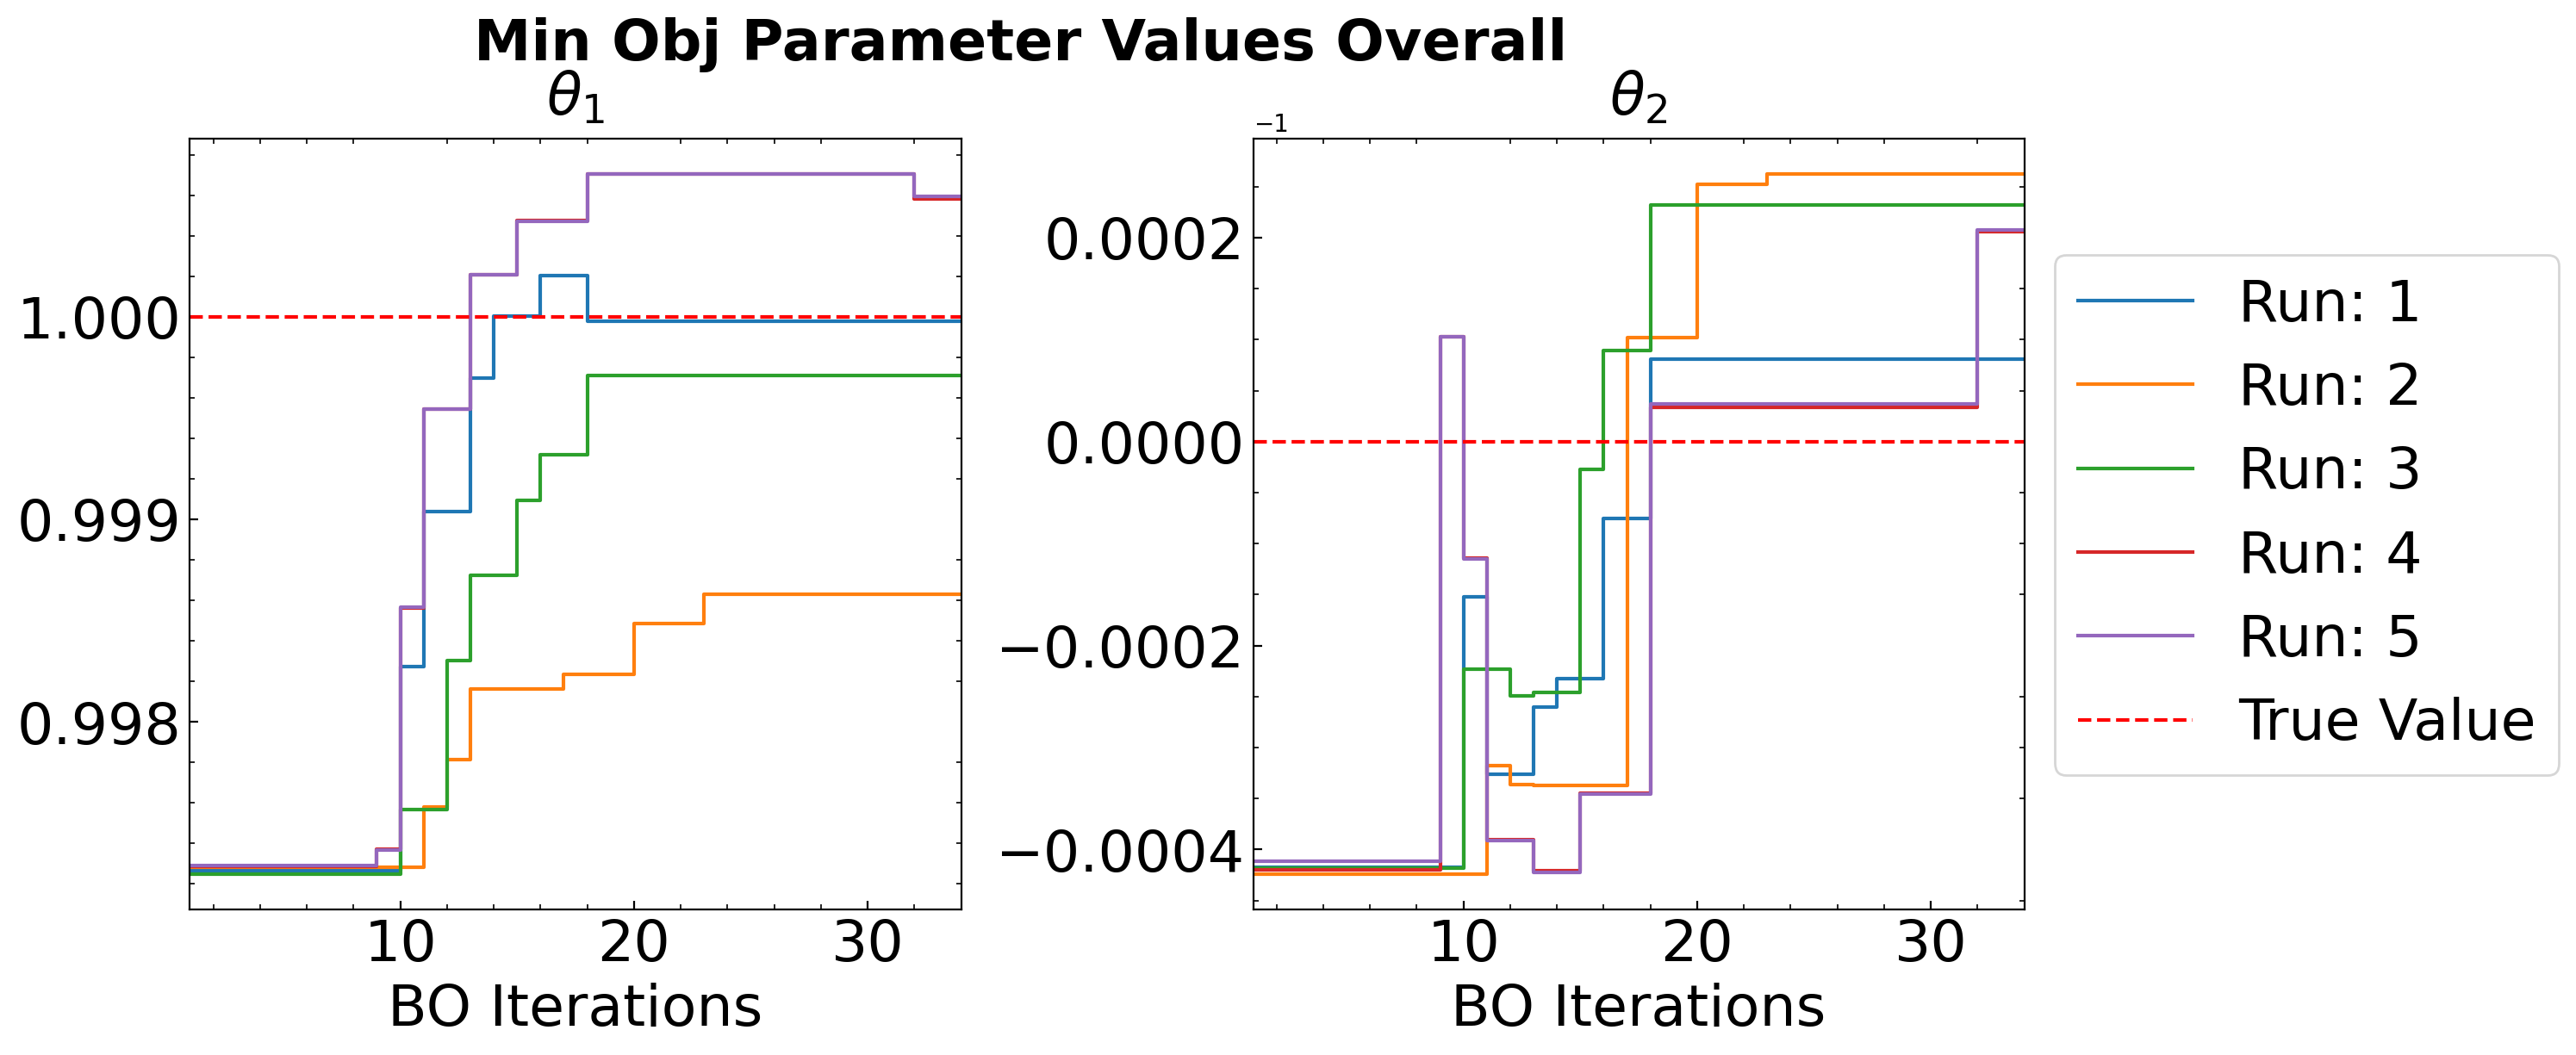

In [12]:
#Get theta @ min sse overall
file_path = "workspace/811c3b5e401ba0adcedd67a67dbf2457/BO_Results.gz"

z_choice = "min_sse"

x_label = "BO Iterations"
title = "Min Obj Parameter Values Overall"

save_path = os.path.join(os.path.dirname(file_path), "line_plots", z_choice + "_params")
plot_dict = make_plot_dict(False, title, x_label, None, line_levels = None, save_path=save_path)

data, data_names, data_true = analyze_thetas(file_path, z_choice)
plot_2D_Data_w_BO_Iter(data, data_names, data_true, plot_dict)

workspace/811c3b5e401ba0adcedd67a67dbf2457\line_plots\ei_params


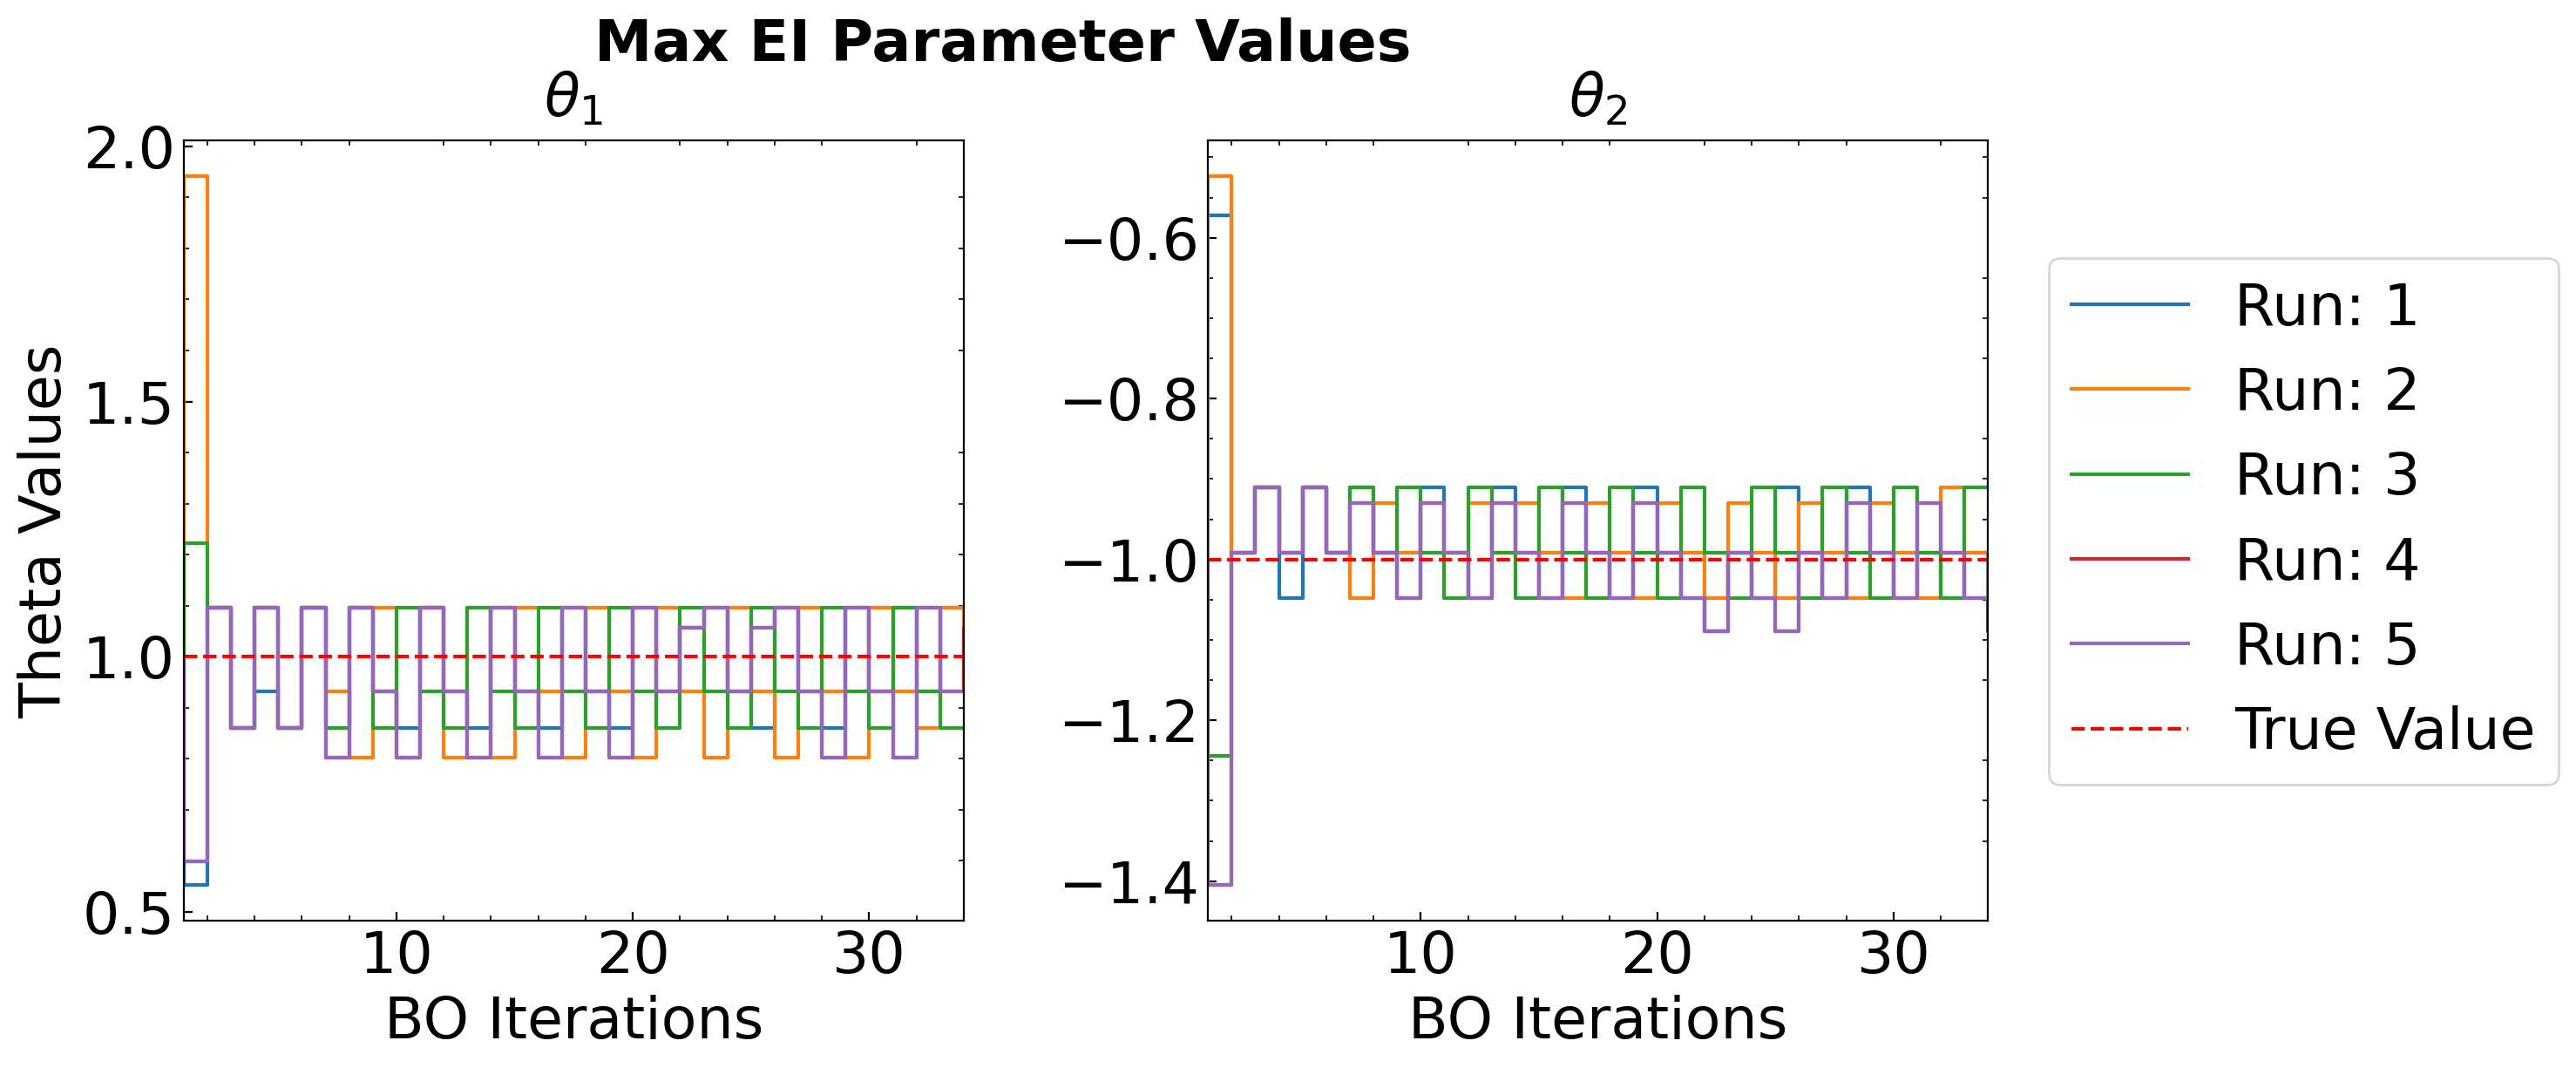

In [13]:
#Get theta @ Max EI
file_path = "2023/08/28/Data_Files/CS1_meth_A2_sep_fact_1.0.pickle"
file_path = "2023/09/05/Data_Files/CS2_BO_method_C2_ep_method_BOYLE.pickle"
file_path = "2023/09/05/Data_Files/CS2_BO_method_B1_ep_method_CONSTANT.pickle"
file_path = "workspace/811c3b5e401ba0adcedd67a67dbf2457/BO_Results.gz"

z_choice = "ei"

x_label = "BO Iterations"
y_label = "Theta Values"
title = "Max EI Parameter Values"

save_path = os.path.join(os.path.dirname(file_path), "line_plots", z_choice + "_params")
plot_dict = make_plot_dict(False, title, x_label, y_label, line_levels = None, save_path=save_path)

data, data_names, data_true = analyze_thetas(file_path, z_choice)
plot_2D_Data_w_BO_Iter(data, data_names, data_true, plot_dict)

In [14]:
# #Get Median Data from sf experiment
df_median, job_list_med = get_median_data(criteria_dict, df, job_list, theta_true, save_csv)

for i in range(len(job_list_med)): 
    print(job_list_med[i].id)
    
df_median

7d335fac3f3dbef1def51beac296d8bf
f77eb15458c0df1814cb2d097bc16619
bfaeb98a04d2a186bf9fc0c5a87602e7
6c8f446e38438959407a256119512c05
08978be5acb14bc5c527c23532eaa621
811c3b5e401ba0adcedd67a67dbf2457


Run Number  BO Iter  Best Error  Exploration Bias        Max EI  \
394           3        1    5.342819               1.0  0.000000e+00   
808           2        3   -1.892936               1.0  7.831280e-36   
689           3       13    0.000081               1.0  2.080328e+02   
335           4       25  -10.949796               1.0  4.356385e+01   
15            1       16    0.000078               1.0  3.062063e-07   
565           4       40    0.000075               1.0  2.637992e-07   

                                  Theta Max EI    Min Obj  Min Obj Act  \
394  [-0.3157894736842106, 1.3684210526315788]   3.022418     0.140123   
808                 [-2.0, 1.3684210526315788]  -2.583123    -2.564028   
689  [0.9966064102521547, -0.9991530616789805]   0.000040     0.000138   
335  [1.0000178934814583, -0.9986911875010044] -10.892746    -9.866923   
15    [0.8603040674988498, -0.910657604164606]   0.000002     0.000008   
565   [1.096657295630544, -0.9917334311415682]   0.000002     0.000015   

                                 Theta Min Obj Min Obj Cum.  ...    Regret  \
394  [0.9320565631688038, -0.9474307078209747]     0.140123  ...       inf   
808  [0.9516392169916362, -1.0397071474290542]    -2.564028  ...  0.737344   
689  [0.9966127167261936, -0.9991659647239534]     0.000081  ...  0.000254   
335  [0.9997535806596851, -0.9987721987155869]   -10.450965  ...  2.042136   
15   [0.9990942905040344, -1.0000266104137017]     0.000008  ...  0.000018   
565  [1.0012152567250223, -1.0000848800358213]     0.000005  ...  0.000019   

        Speed   Time/Iter  EP Method Val BO Method  \
394       inf    2.088265       CONSTANT        A1   
808  0.059543    3.237633       CONSTANT        B1   
689  0.000008    8.139353       CONSTANT        A2   
335  0.124988  181.236120       CONSTANT        B2   
15   0.000372   11.332165       CONSTANT        C2   
565  0.000177   30.608803       CONSTANT        D2   

                               Job ID Max Evals  Termination Total Run Time  \
394  7d335fac3f3dbef1def51beac296d8bf        16       ei-obj      33.412247   
808  f77eb15458c0df1814cb2d097bc16619         6    ei-regret      19.425795   
689  bfaeb98a04d2a186bf9fc0c5a87602e7        26          obj     211.623179   
335  6c8f446e38438959407a256119512c05        28          obj    5074.611373   
15   08978be5acb14bc5c527c23532eaa621        34   obj-regret     385.293594   
565  811c3b5e401ba0adcedd67a67dbf2457        48   obj-regret    1469.222534   

     L2 Norm Theta  
394       0.085906  
808       0.062573  
689       0.003488  
335       0.001252  
15        0.000906  
565       0.001218  

[6 rows x 21 columns]

In [15]:
# #Get Mean Data from sf experiment
df_mean, job_list_mean = get_mean_data(criteria_dict, df, job_list, theta_true, save_csv)

for i in range(len(job_list_mean)): 
    print(job_list_mean[i].id)
    
df_mean

7d335fac3f3dbef1def51beac296d8bf
f77eb15458c0df1814cb2d097bc16619
bfaeb98a04d2a186bf9fc0c5a87602e7
6c8f446e38438959407a256119512c05
08978be5acb14bc5c527c23532eaa621
811c3b5e401ba0adcedd67a67dbf2457


Run Number  BO Iter  Best Error  Exploration Bias        Max EI  \
408           3       15    5.342819               1.0  0.000000e+00   
787           1        9   -2.564069               1.0  0.000000e+00   
670           2       20    0.000086               1.0  2.401248e-07   
287           3       27  -10.519601               1.0  4.895559e+01   
110           4        9    0.000086               1.0  1.381169e-06   
427           1        9    0.000076               1.0  2.504833e-07   

                                    Theta Max EI    Min Obj  Min Obj Act  \
408    [-0.3157894736842106, 1.3684210526315788]   2.306116     0.562206   
787    [0.3157894736842106, -0.5263157894736843]  -2.592402    -1.859226   
670  [-0.10526315789473695, 0.10526315789473673]   0.000016     0.000264   
287    [1.0004024855954028, -0.9992785636323397] -12.183051   -10.852415   
110     [1.096630551832445, -0.9917403943641504]   0.000011     0.000243   
427     [1.096657295630544, -0.9917334311415682]   0.000007     0.000184   

                                 Theta Min Obj Min Obj Cum.  ...    Regret  \
408  [0.8377381288793517, -0.9062360571368153]     0.140123  ...  0.063249   
787  [0.9440185900221204, -1.0605013458550059]    -2.564066  ...  0.009375   
670  [0.9960445502815461, -0.9982226238924355]      0.00008  ...  0.000227   
287  [1.0004048758192912, -0.9992781038687927]   -10.852415  ...  5.087350   
110  [0.9951049264434847, -0.9996761634425393]      0.00008  ...  0.000248   
427   [0.995800773902059, -0.9995407367818884]     0.000081  ...  0.000240   

        Speed   Time/Iter  EP Method Val BO Method  \
408  0.016348    2.425027       CONSTANT        A1   
787  0.000768    2.883567       CONSTANT        B1   
670  0.003862    6.516778       CONSTANT        A2   
287  0.285175  507.603594       CONSTANT        B2   
110  0.000177    8.957530       CONSTANT        C2   
427  0.000180   12.715346       CONSTANT        D2   

                               Job ID Max Evals  Termination Total Run Time  \
408  7d335fac3f3dbef1def51beac296d8bf        16       ei-obj      38.800434   
787  f77eb15458c0df1814cb2d097bc16619        27       ei-obj      77.856318   
670  bfaeb98a04d2a186bf9fc0c5a87602e7        26          obj     169.436222   
287  6c8f446e38438959407a256119512c05        50   max_budget   25380.179691   
110  08978be5acb14bc5c527c23532eaa621        35   obj-regret     313.513559   
427  811c3b5e401ba0adcedd67a67dbf2457        34   obj-regret     432.321759   

     L2 Norm Theta  
408       0.187405  
787       0.082428  
670       0.004336  
287       0.000828  
110       0.004906  
427       0.004224  

[6 rows x 21 columns]